In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
terror = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Mariam work\globalterrorismdb_0718dist.csv", encoding ='latin1')
terror.head()

C:\Users\maria\AppData\Local\Temp\ipykernel_17640\1814060756.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv(r"C:\Users\maria\OneDrive\Documents\Mariam work\globalterrorismdb_0718dist.csv", encoding ='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror.shape

(181691, 135)

In [4]:
print(terror.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [5]:
terror_copy = terror[['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt', 'city', 'specificity', 'alternative_txt', 'multiple', 'success'\
    ,'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'gname', 'nperps', 'suicide' ,'weaptype1_txt', 'nkill', 'nwound', 'propextent_txt']]

In [6]:
terror_copy.rename(columns={'eventid':'Eventid','iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'specificity' :'Specificity', 'extended':'More than 24hr','city':'City','alternative_txt':'Attack_Category', 'attacktype1_txt':'Attack_type','targtype1_txt':'Target','targsubtype1_txt':'Target_Subtype'\
    ,'gname':'Organization_name', 'nperps': 'Perperators', 'weaptype1_txt':'Weapon_type', 'nkill':'Fatalities', 'nwound':'Injured', 'propextent_txt':'Property_Damaged', 'success':'Success', 'multiple':'Multiple'}, inplace =True)
terror_copy

C:\Users\maria\AppData\Local\Temp\ipykernel_17640\3280132880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_copy.rename(columns={'eventid':'Eventid','iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'specificity' :'Specificity', 'extended':'More than 24hr','city':'City','alternative_txt':'Attack_Category', 'attacktype1_txt':'Attack_type','targtype1_txt':'Target','targsubtype1_txt':'Target_Subtype'\


,Eventid,Year,Month,Day,More than 24hr,Country,Region,City,Specificity,Attack_Category,...,Attack_type,Target,Target_Subtype,Organization_name,Perperators,suicide,Weapon_type,Fatalities,Injured,Property_Damaged
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1.0,NaN,...,Assassination,Private Citizens & Property,Named Civilian,MANO-D,NaN,0,Unknown,1.0,0.0,NaN
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,1.0,NaN,...,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,7.0,0,Unknown,0.0,0.0,NaN
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,4.0,NaN,...,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,0,Unknown,1.0,0.0,NaN
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,1.0,NaN,...,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,0,Explosives,NaN,NaN,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,1.0,NaN,...,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,NaN,0,Incendiary,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.0,Insurgency/Guerilla Action,...,Armed Assault,Military,Military Checkpoint,Al-Shabaab,-99.0,0,Firearms,1.0,2.0,NaN
181687,201712310029,2017,12,31,0,Syria,Middle East & North Africa,Jableh,1.0,Insurgency/Guerilla Action,...,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,-99.0,0,Explosives,2.0,7.0,Unknown
181688,201712310030,2017,12,31,0,Philippines,Southeast Asia,Kubentog,2.0,NaN,...,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0,Incendiary,0.0,0.0,Unknown
181689,201712310031,2017,12,31,0,India,South Asia,Imphal,1.0,NaN,...,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,-99.0,0,Explosives,0.0,0.0,NaN


In [7]:
for col in terror_copy.columns:
    print(f'Column: {col:35} | type{str(terror_copy[col].dtype):7} | missing values: {terror_copy[col].isna().sum():3d}')

Column: Eventid                             | typeint64   | missing values:   0
Column: Year                                | typeint64   | missing values:   0
Column: Month                               | typeint64   | missing values:   0
Column: Day                                 | typeint64   | missing values:   0
Column: More than 24hr                      | typeint64   | missing values:   0
Column: Country                             | typeobject  | missing values:   0
Column: Region                              | typeobject  | missing values:   0
Column: City                                | typeobject  | missing values: 434
Column: Specificity                         | typefloat64 | missing values:   6
Column: Attack_Category                     | typeobject  | missing values: 152680
Column: Multiple                            | typefloat64 | missing values:   1
Column: Success                             | typeint64   | missing values:   0
Column: Attack_type                  

In [8]:
terror_copy = terror_copy[terror_copy['Month']!=0]
terror_copy = terror_copy[terror_copy['Perperators'] != -99]

In [9]:
terror_copy['Year'] = terror_copy['Year'].map(str)
terror_copy['Month'] = terror_copy['Month'].map(str)
terror_copy['Day'] = terror_copy['Day'].map(str)

In [10]:
terror_copy = terror_copy[terror_copy['Day']!= '0']

In [11]:
terror_copy['Date'] = pd.to_datetime(terror_copy['Day']+'/'+terror_copy['Month']+ '/'+terror_copy['Year'])
terror_copy

C:\Users\maria\AppData\Local\Temp\ipykernel_17640\301713959.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  terror_copy['Date'] = pd.to_datetime(terror_copy['Day']+'/'+terror_copy['Month']+ '/'+terror_copy['Year'])


,Eventid,Year,Month,Day,More than 24hr,Country,Region,City,Specificity,Attack_Category,...,Target,Target_Subtype,Organization_name,Perperators,suicide,Weapon_type,Fatalities,Injured,Property_Damaged,Date
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1.0,NaN,...,Private Citizens & Property,Named Civilian,MANO-D,NaN,0,Unknown,1.0,0.0,NaN,1970-02-07
6,197001020001,1970,1,2,0,Uruguay,South America,Montevideo,1.0,NaN,...,Police,Police Security Forces/Officers,Tupamaros (Uruguay),3.0,0,Firearms,0.0,0.0,NaN,1970-02-01
8,197001020003,1970,1,2,0,United States,North America,Madison,1.0,NaN,...,Military,Military Recruiting Station/Academy,New Year's Gang,1.0,0,Incendiary,0.0,0.0,Minor (likely < $1 million),1970-02-01
9,197001030001,1970,1,3,0,United States,North America,Madison,1.0,NaN,...,Government (General),Government Building/Facility/Office,New Year's Gang,1.0,0,Incendiary,0.0,0.0,Minor (likely < $1 million),1970-03-01
10,197001050001,1970,1,1,0,United States,North America,Baraboo,1.0,Insurgency/Guerilla Action,...,Military,Military Barracks/Base/Headquarters/Checkpost,"Weather Underground, Weathermen",NaN,0,Explosives,0.0,0.0,Minor (likely < $1 million),1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181653,201712300011,2017,12,31,0,Cameroon,Sub-Saharan Africa,Bia,1.0,NaN,...,Business,Restaurant/Bar/Café,Boko Haram,1.0,1,Explosives,2.0,28.0,Minor (likely < $1 million),2017-12-31
181656,201712300014,2017,12,30,1,Nigeria,Sub-Saharan Africa,Maiwa,2.0,NaN,...,Private Citizens & Property,Laborer (General)/Occupation Identified,Boko Haram,16.0,0,Firearms,25.0,NaN,Minor (likely < $1 million),2017-12-30
181660,201712300018,2017,12,30,0,Ukraine,Eastern Europe,Kharkiv,1.0,Other Crime Type,...,Government (General),Government Building/Facility/Office,Unknown,1.0,1,Explosives,0.0,1.0,NaN,2017-12-30
181665,201712300023,2017,12,30,0,India,South Asia,Toylanka,1.0,NaN,...,Business,Construction,Communist Party of India - Maoist (CPI-Maoist),12.0,0,Firearms,0.0,0.0,Minor (likely < $1 million),2017-12-30


In [12]:
terror_copy.dropna(subset={'Multiple'}, inplace=True)

In [13]:
monthly_mapping = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}
success_mapping = {1:'Yes', 0:'No'}

terror_copy['Month'] = terror_copy['Month'].apply(lambda x:monthly_mapping[x])
terror_copy['Success'] = terror_copy['Success'].apply(lambda x:success_mapping[x])
terror_copy['suicide'] = terror_copy['suicide'].apply(lambda x:success_mapping[x])
terror_copy['More than 24hr'] = terror_copy['More than 24hr'].apply(lambda x:success_mapping[x])
terror_copy['Multiple'] = terror_copy['Multiple'].apply(lambda x:success_mapping[x])

In [14]:
# Replacing the columns with missing values
terror_copy['Attack_Category'].fillna("Undisclosed", inplace = True)
terror_copy['Target_Subtype'].fillna("Undisclosed", inplace = True)
terror_copy['Property_Damaged'].fillna("Undisclosed", inplace =True)
terror_copy['Perperators'].fillna(0, inplace = True)
terror_copy['Fatalities'].fillna(0, inplace =True)
terror_copy['Injured'].fillna(0, inplace = True)

In [15]:
terror_copy['Eventid'].duplicated().sum()

0

In [16]:
# Total Number of Attacks
Total_attacks = terror_copy['Eventid'].count()
print(f'The Total number of attacks that have been cleaned are {Total_attacks}')

The Total number of attacks that have been cleaned are 98780


In [17]:
countries = terror_copy['Country'].nunique()
print(f'There are {countries} countries affected by terrorist attacks')

There are 203 countries affected by terrorist attacks


In [18]:
death = terror_copy['Fatalities'].sum()
print(f'The number of deaths over the years are {death}')

The number of deaths over the years are 250609.0


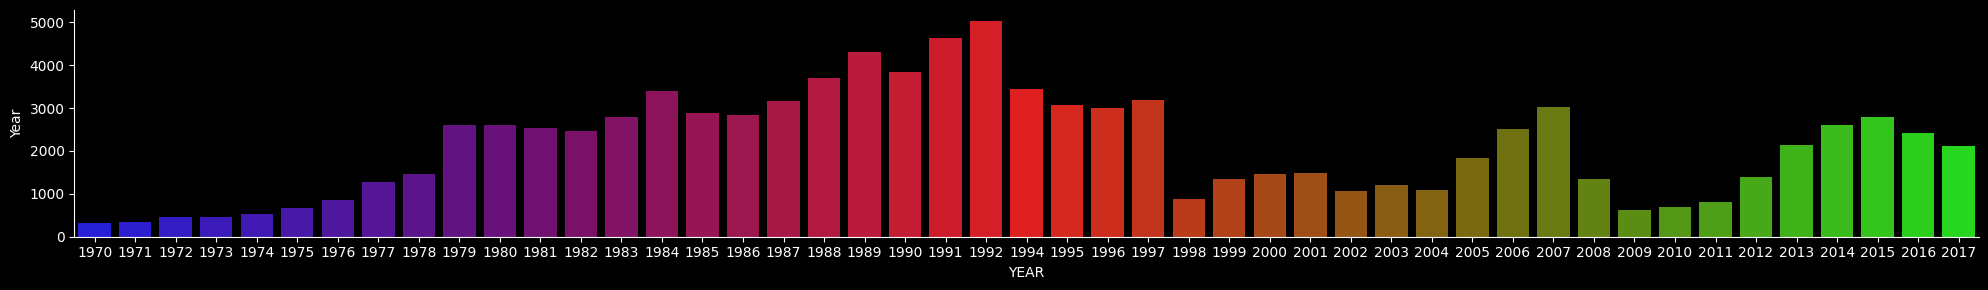

In [19]:
# # Year with most attacks
terror_copy['YEAR'] = terror_copy['Date'].dt.year
Year = terror_copy.groupby('YEAR')['Eventid'].count().reset_index()
Year.rename(columns ={'Eventid':'No of Attacks'}, inplace = True)
plt.figure(figsize=(20, 3))
sns.barplot(x = 'YEAR', y = 'No of Attacks', data = Year, palette='brg')
sns.despine()
plt.tight_layout()
plt.ylabel('Year')
plt.show()

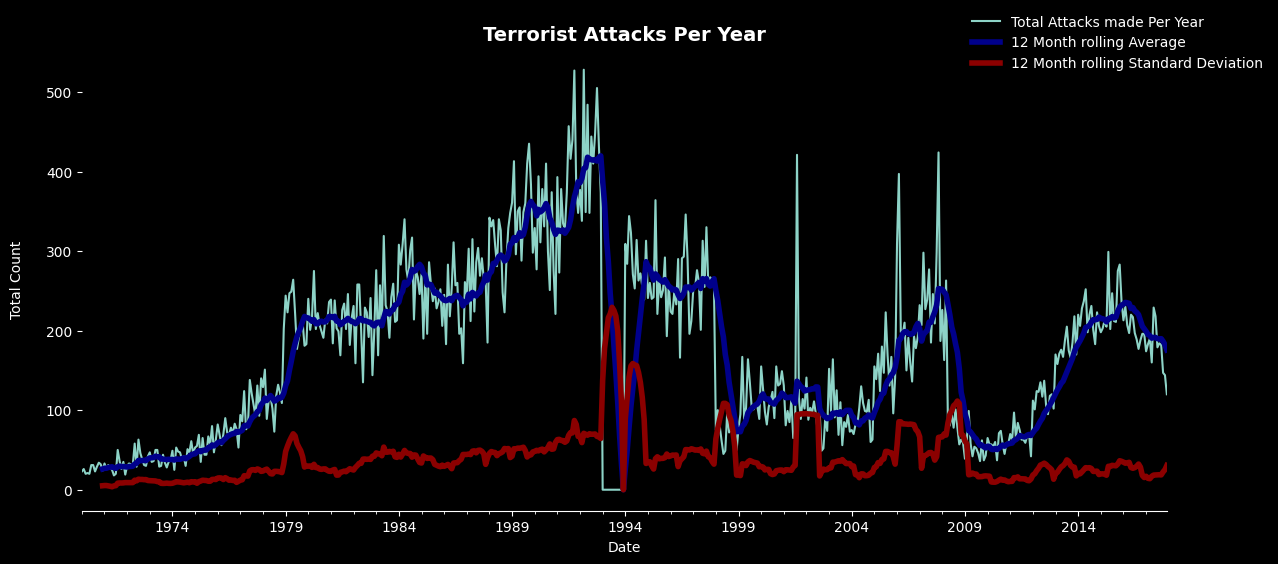

In [20]:
fig, ax = plt.subplots(figsize = (14,6))
terror_copy.set_index('Date').resample('M').size().plot(label = 'Total Attacks made Per Year', ax = ax)
terror_copy.set_index('Date').resample('M').size().rolling(window = 12).mean().plot(color = 'darkblue', linewidth = 4, label = '12 Month rolling Average', ax = ax)
terror_copy.set_index('Date').resample('M').size().rolling(window = 12).std().plot(color = 'darkred', linewidth = 4, label = '12 Month rolling Standard Deviation', ax = ax)
ax.set_title("Terrorist Attacks Per Year", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

In [21]:
# Terrorist attacks in the year 2014, using 2014 as a case study
year_2014 = terror_copy.loc[terror_copy['YEAR'] == 2014]
year_2014

,Eventid,Year,Month,Day,More than 24hr,Country,Region,City,Specificity,Attack_Category,...,Target_Subtype,Organization_name,Perperators,suicide,Weapon_type,Fatalities,Injured,Property_Damaged,Date,YEAR
125336,201401010002,2014,January,1,No,Somalia,Sub-Saharan Africa,Mogadishu,1.0,Undisclosed,...,Hotel/Resort,Al-Shabaab,2.0,Yes,Explosives,4.0,20.0,Minor (likely < $1 million),2014-01-01,2014
125337,201401010003,2014,January,1,No,Pakistan,South Asia,Quetta,1.0,Undisclosed,...,Religion Identified,Jaish-e-Islam,1.0,Yes,Explosives,3.0,31.0,Minor (likely < $1 million),2014-01-01,2014
125340,201401010007,2014,January,1,No,Iraq,Middle East & North Africa,Mosul,1.0,Insurgency/Guerilla Action,...,Military Unit/Patrol/Convoy,Unknown,1.0,Yes,Explosives,2.0,6.0,Undisclosed,2014-01-01,2014
125346,201401010023,2014,January,1,No,Egypt,Middle East & North Africa,Shubra el-Kheima,1.0,Undisclosed,...,"Police Building (headquarters, station, school)",Unknown,1.0,No,Explosives,0.0,3.0,Minor (likely < $1 million),2014-01-01,2014
125357,201401010034,2014,January,1,No,Iraq,Middle East & North Africa,Karma,1.0,Undisclosed,...,Police Checkpoint,Islamic State of Iraq and the Levant (ISIL),24.0,No,Firearms,0.0,0.0,Minor (likely < $1 million),2014-01-01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142221,201412310087,2014,December,31,No,Nigeria,Sub-Saharan Africa,Maiduwa,1.0,Undisclosed,...,Undisclosed,Boko Haram,8.0,Yes,Explosives,6.0,2.0,Undisclosed,2014-12-31,2014
142222,201412310088,2014,December,31,No,Nigeria,Sub-Saharan Africa,Gombe,1.0,Insurgency/Guerilla Action,...,Military Barracks/Base/Headquarters/Checkpost,Unknown,1.0,Yes,Explosives,1.0,0.0,Undisclosed,2014-12-31,2014
142228,201412310095,2014,December,31,No,Ukraine,Eastern Europe,Mykolayiv,1.0,Undisclosed,...,"Public Area (garden, parking lot, garage, beac...",Unknown,1.0,No,Explosives,0.0,0.0,Minor (likely < $1 million),2014-12-31,2014
142233,201412310101,2014,December,31,No,West Bank and Gaza Strip,Middle East & North Africa,Yatta,1.0,Undisclosed,...,House/Apartment/Residence,Israeli settlers,2.0,No,Incendiary,0.0,0.0,Minor (likely < $1 million),2014-12-31,2014


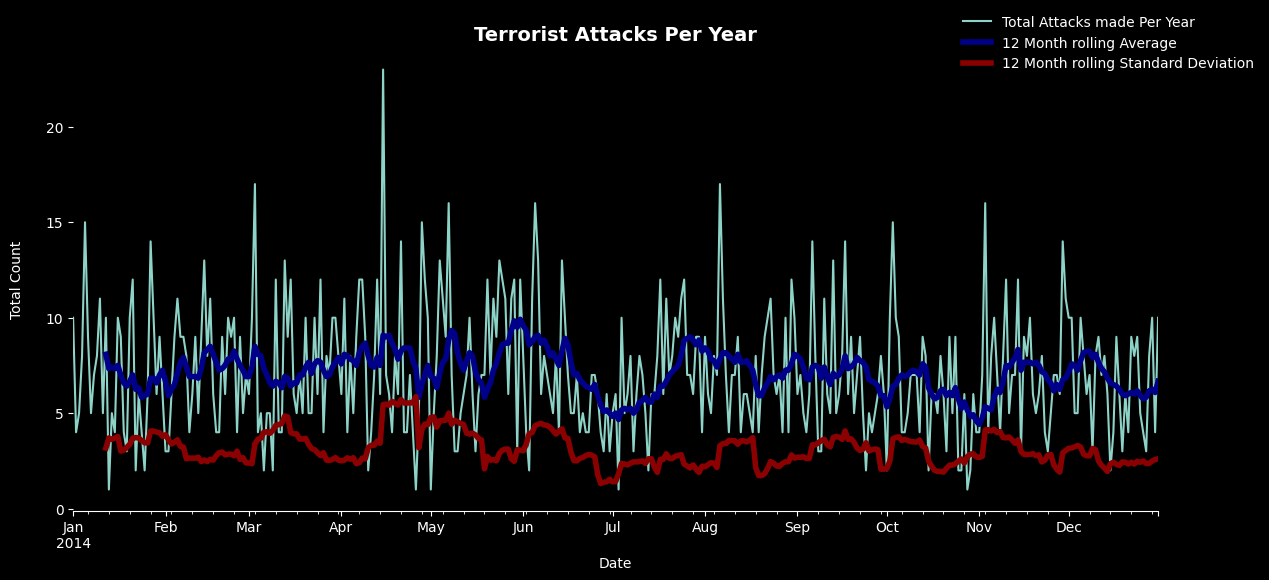

In [22]:
# Trend of Terrorist attacks in 2014
fig, ax = plt.subplots(figsize = (14,6))
year_2014.set_index('Date').resample('D').size().plot(label = 'Total Attacks made Per Year', ax = ax)
year_2014.set_index('Date').resample('D').size().rolling(window = 12).mean().plot(color = 'darkblue', linewidth = 4, label = '12 Month rolling Average', ax = ax)
year_2014.set_index('Date').resample('D').size().rolling(window = 12).std().plot(color = 'darkred', linewidth = 4, label = '12 Month rolling Standard Deviation', ax = ax)
ax.set_title("Terrorist Attacks Per Year", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

In [23]:
# No of attacks per month in 2014
month = year_2014.groupby('Month')['Eventid'].size().reset_index().sort_values('Eventid', ascending = False)
month.rename(columns={'Eventid':'No of attacks'}, inplace=True)
month

,Month,No of attacks
8,May,273
5,July,247
0,April,242
7,March,241
6,June,214
1,August,210
3,February,207
9,November,204
2,December,195
4,January,193


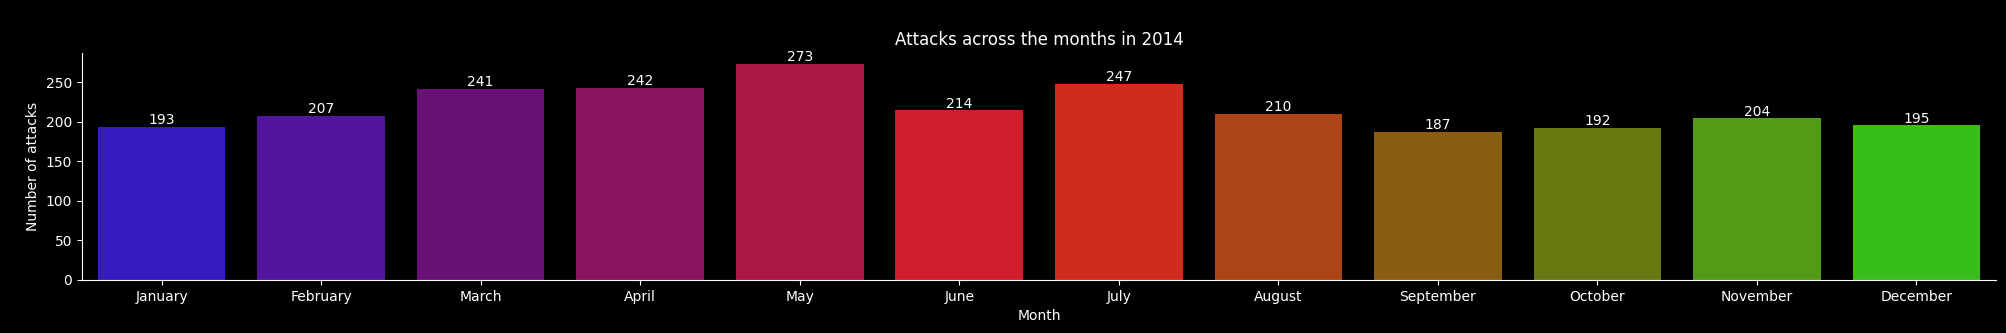

In [24]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
month = month.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
plt.figure(figsize=(20, 3))
ax = sns.barplot(x = 'Month', y = 'No of attacks', data = month, palette='brg')
sns.despine()
plt.tight_layout()
plt.title('\nAttacks across the months in 2014')
plt.ylabel('\nNumber of attacks')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [25]:
organizations = year_2014.groupby('Organization_name')['Eventid'].count().reset_index()
organizations.rename(columns={'Organization_name':'Organization', 'Eventid':'Count'}, inplace=True)
organizations = organizations.loc[organizations['Count'] != 1]
organizations = organizations.sort_values('Count', ascending=False)

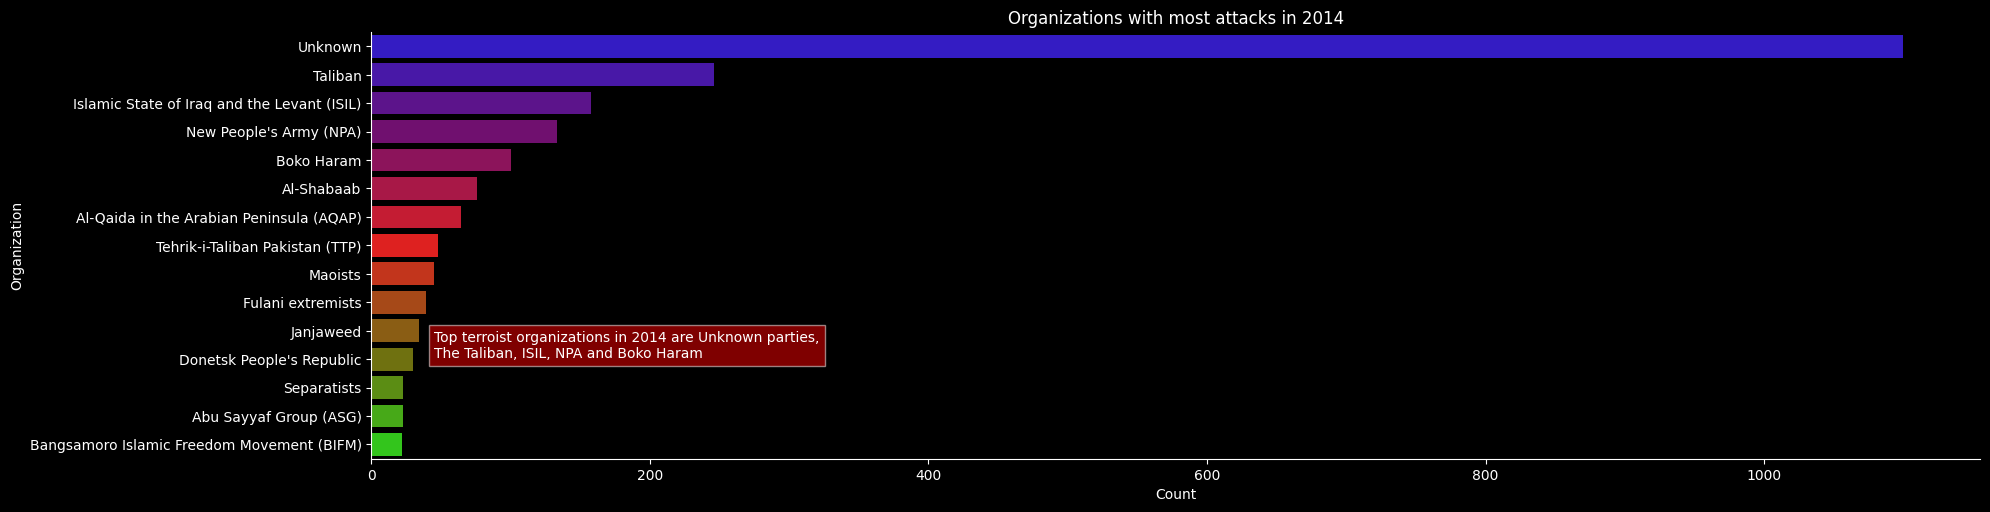

In [26]:
plt.figure(figsize=(20, 5))
p = sns.barplot(x = 'Count', y = 'Organization', data = organizations.head(15), palette='brg')
sns.despine()
plt.tight_layout()
p.text(45,10,'Top terroist organizations in 2014 are Unknown parties,\nThe Taliban, ISIL, NPA and Boko Haram', bbox=dict(facecolor='red', alpha=0.50), ha = 'left', va = 'top')
p.set(title="Organizations with most attacks in 2014") 
plt.show()

In [27]:
# Countries that were mostly affected in 2014
countries_2014 = year_2014.groupby('Country')['Eventid'].size().reset_index()
countries_2014.rename(columns={'Eventid':'Count'}, inplace=True)
countries_2014 = countries_2014.sort_values('Count', ascending=False)
countries_2014

,Country,Count
0,Afghanistan,383
45,Pakistan,359
27,Iraq,345
48,Philippines,260
24,India,192
...,...,...
6,Belgium,1
21,Georgia,1
18,Dominican Republic,1
17,Djibouti,1


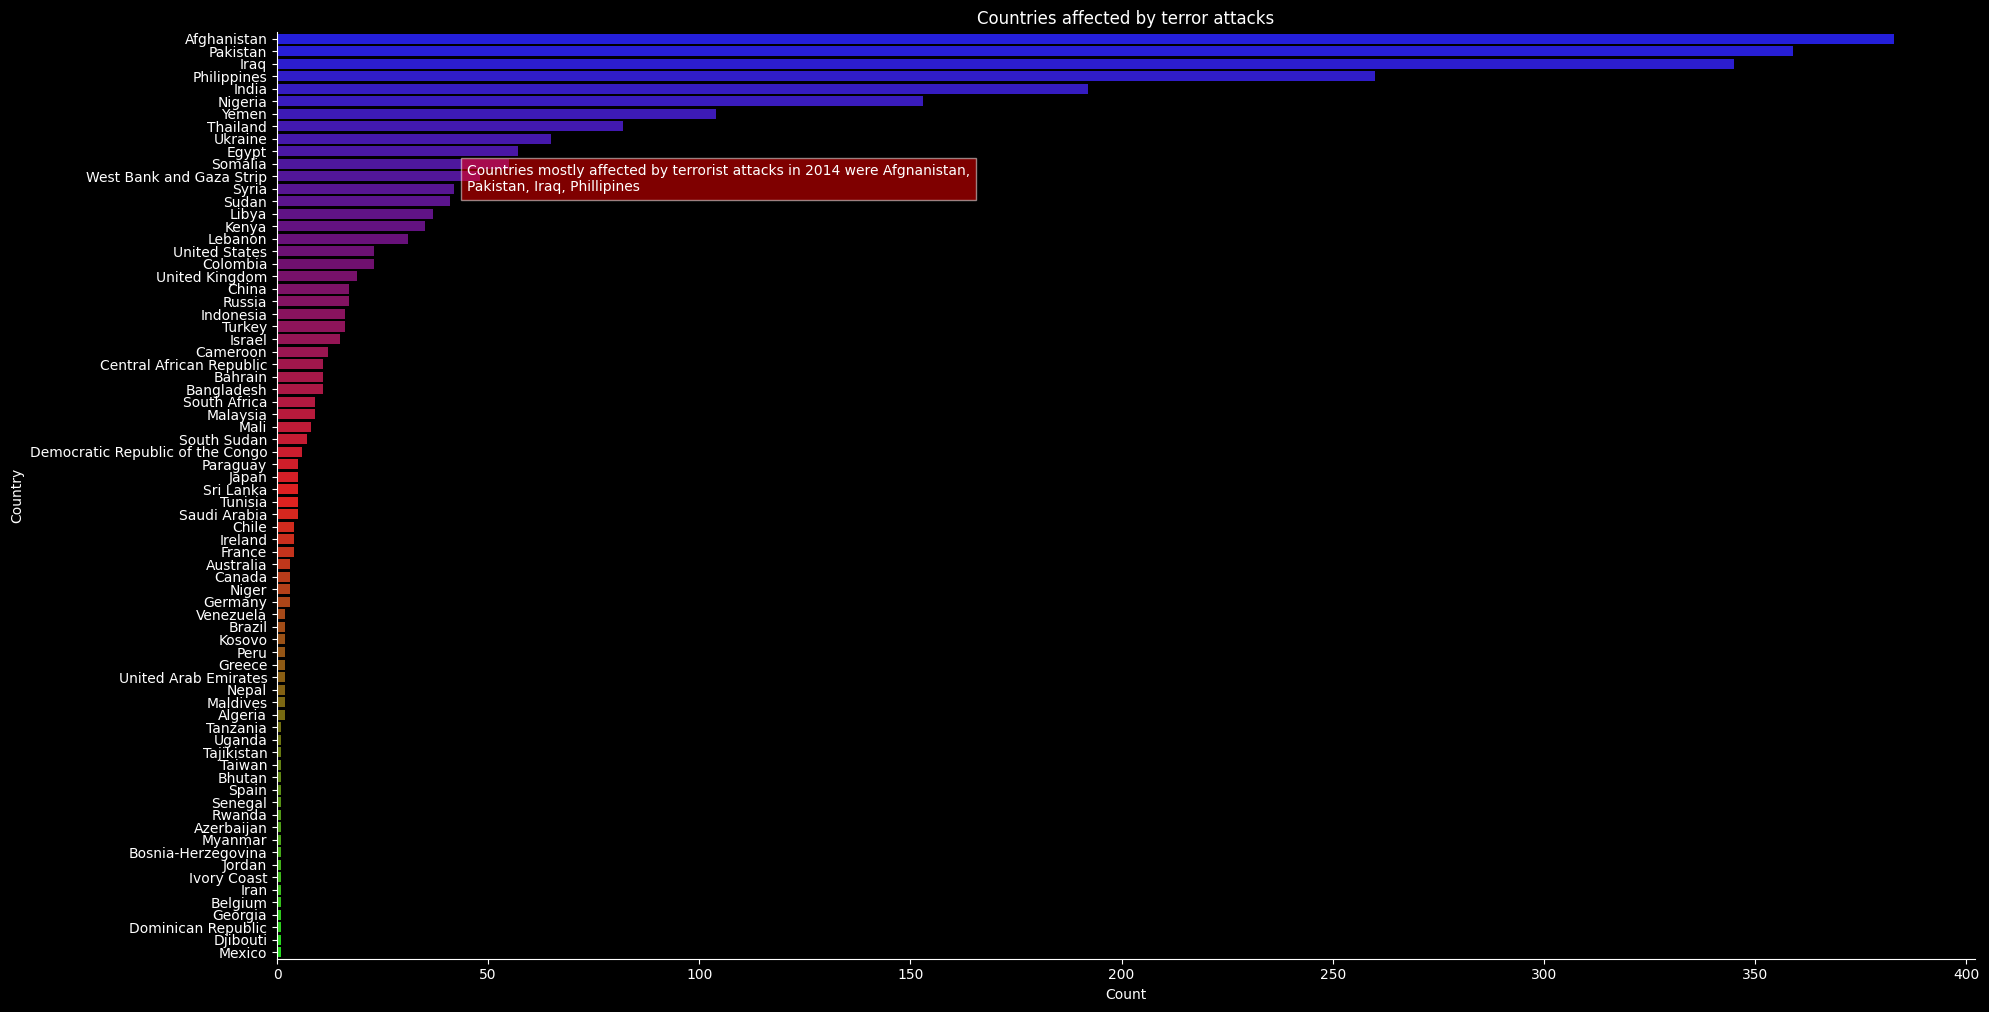

In [28]:
plt.figure(figsize=(20, 10))
p = sns.barplot(x = 'Count', y = 'Country', data = countries_2014, palette='brg')
sns.despine()
plt.tight_layout()
p.text(45,10,'Countries mostly affected by terrorist attacks in 2014 were Afgnanistan,\nPakistan, Iraq, Phillipines', bbox=dict(facecolor='red', alpha=0.50), ha = 'left', va = 'top')
p.set(title="Countries affected by terror attacks") 
plt.show()

In [29]:
Country_by_Region = year_2014[['Region', 'Country', 'Fatalities']].groupby(['Region', 'Country']).count()
Country_by_Region = Country_by_Region.sort_values(by='Fatalities', ascending=False).reset_index()


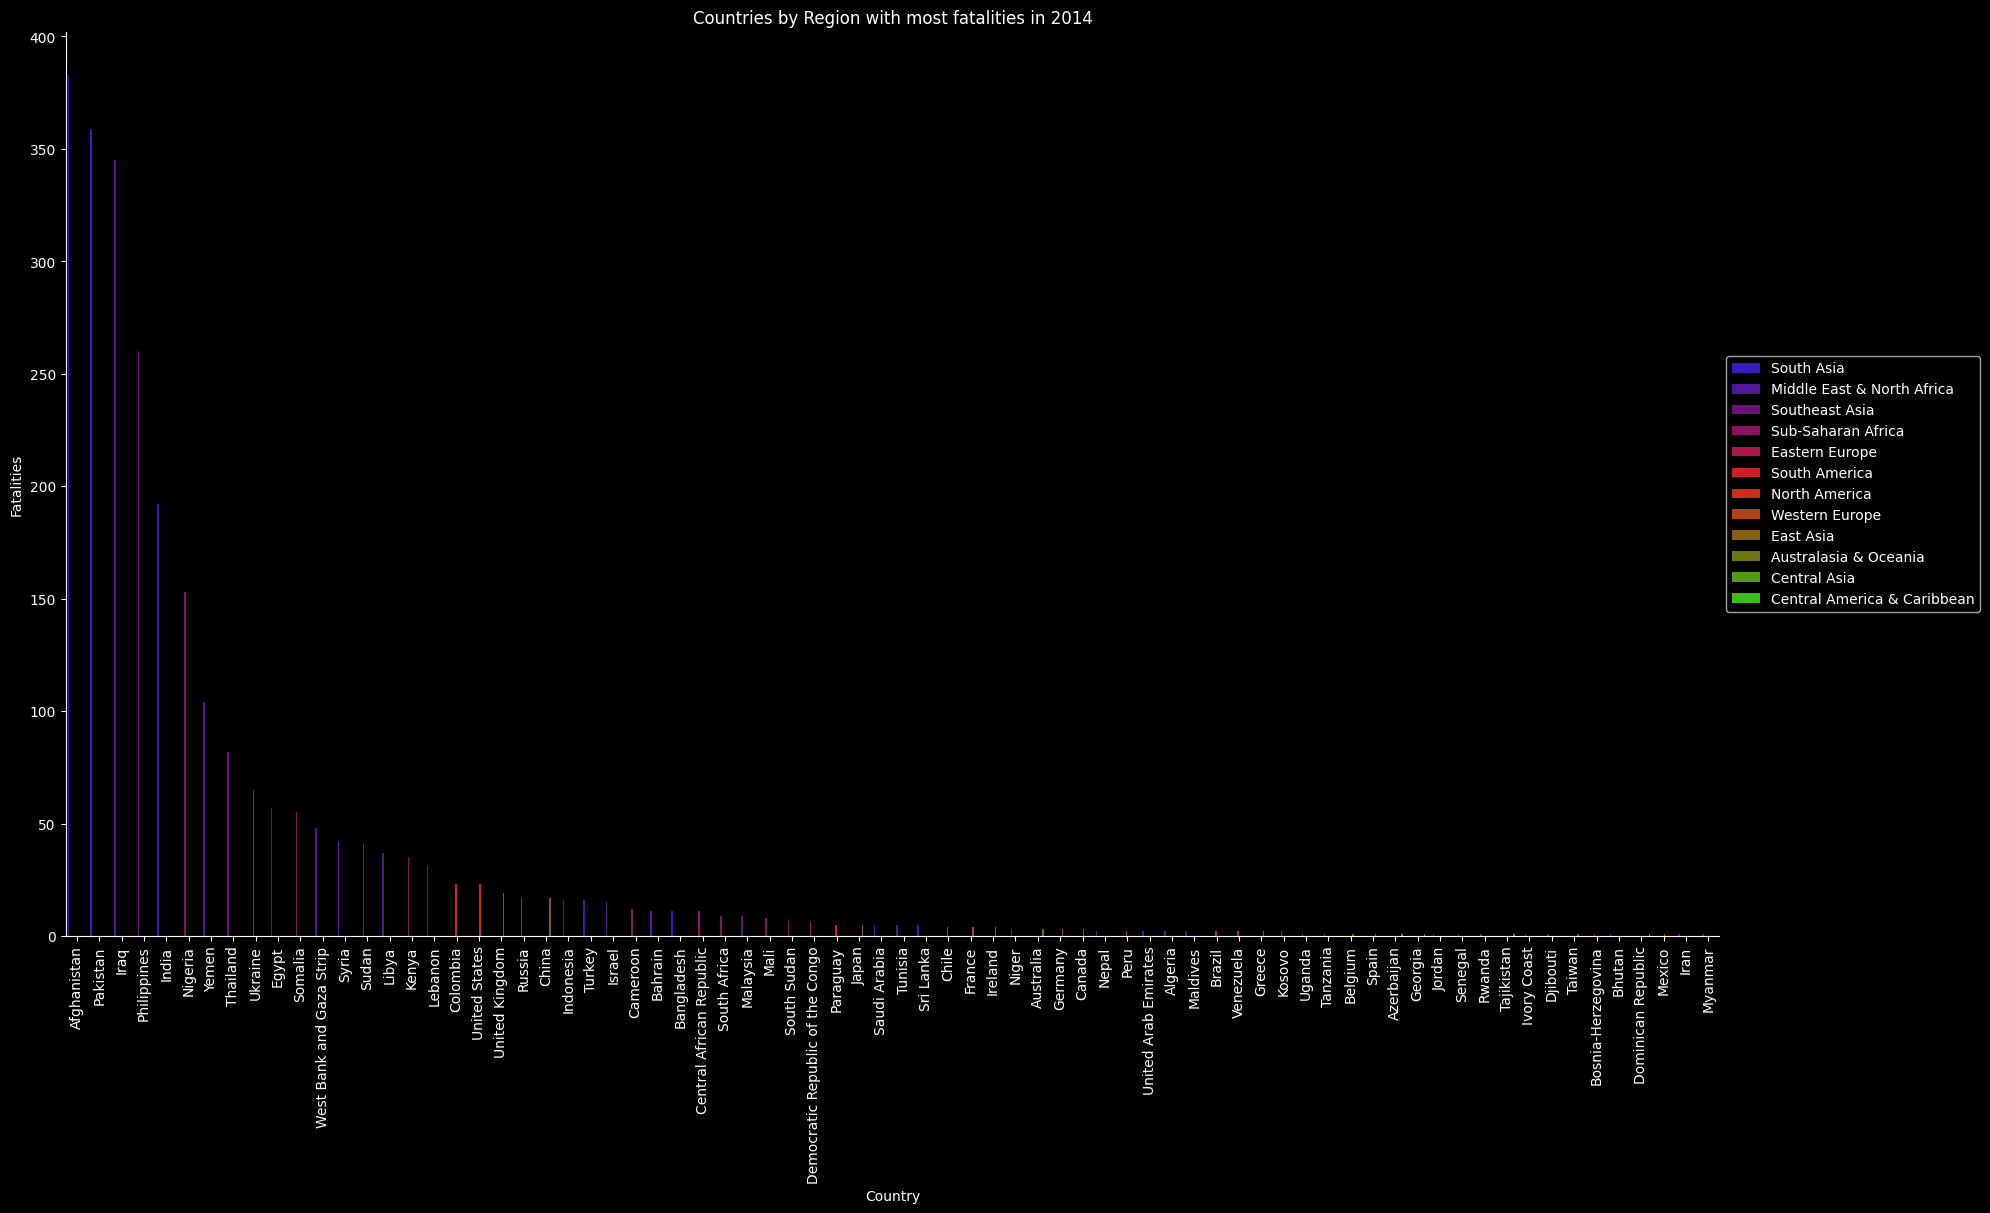

In [30]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = 'Country', y = 'Fatalities', hue = 'Region', data=Country_by_Region, palette='brg')
plt.title('Countries by Region with most fatalities in 2014')
ax.legend(bbox_to_anchor=(1, .5), loc='center left')
sns.despine()
plt.tight_layout()
plt.ylabel('Fatalities')
plt.xticks(rotation = 90)
plt.show()

In [31]:
Australia = year_2014['Region'].value_counts()['Australasia & Oceania']
Central_America = year_2014['Region'].value_counts()['Central America & Caribbean']
Central_Asia = year_2014['Region'].value_counts()['Central Asia']
East_Asia = year_2014['Region'].value_counts()['East Asia']
East_Europe = year_2014['Region'].value_counts()['Eastern Europe']
Middle_East = year_2014['Region'].value_counts()['Middle East & North Africa']
North_America = year_2014['Region'].value_counts()['North America']
South_America = year_2014['Region'].value_counts()['South America']
South_Asia = year_2014['Region'].value_counts()['Southeast Asia']
Africa = year_2014['Region'].value_counts()['Sub-Saharan Africa']
Western_Europe = year_2014['Region'].value_counts()['Western Europe']

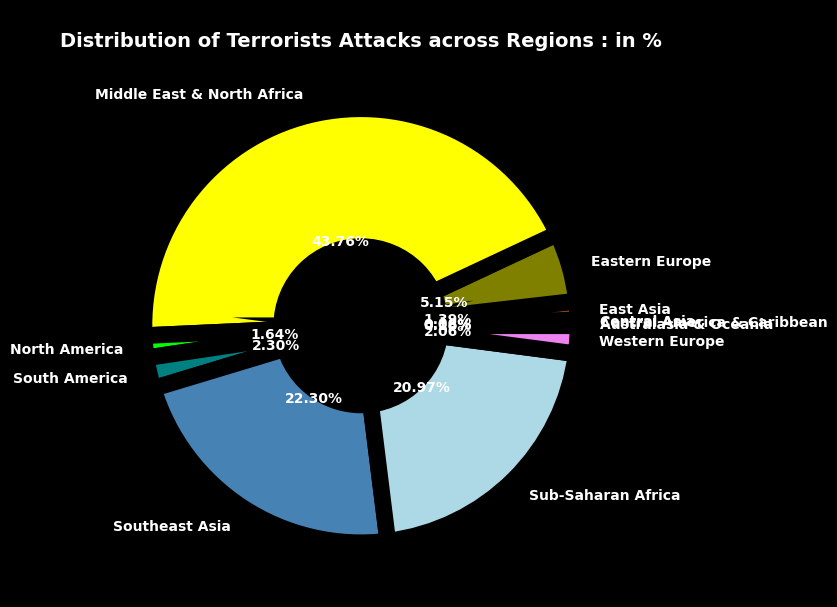

In [32]:
names = ['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']
size = [Australia, Central_America, Central_Asia, East_Asia, East_Europe, Middle_East, North_America, South_America, South_Asia, Africa, Western_Europe]

plt.pie(x=size, labels=names, colors=['blue', 'darkorange', 'silver', 'saddlebrown', 'olive', 'yellow', 'lime', 'teal', 'steelblue', 'lightblue', 'violet'], 
        autopct='%1.2f%%', pctdistance=0.4, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':12, 'edgecolor':'black'})
my_circle = plt.Circle((0,0), 0.4, color='black')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,10)
fig.gca().add_artist(my_circle)
plt.title('\nDistribution of Terrorists Attacks across Regions : in %', fontsize=14, fontweight='bold')
plt.show()

In [33]:
Organization_by_Region = year_2014[['Region', 'Organization_name', 'Fatalities']].groupby(['Region', 'Organization_name']).count()
Organization_by_Region = Organization_by_Region.sort_values(by='Fatalities', ascending=False).reset_index()
Organization_by_Region

,Region,Organization_name,Fatalities
0,South Asia,Unknown,442
1,Middle East & North Africa,Unknown,370
2,South Asia,Taliban,246
3,Middle East & North Africa,Islamic State of Iraq and the Levant (ISIL),157
4,Southeast Asia,Unknown,157
...,...,...,...
180,North America,Anti-Muslim extremists,1
181,North America,Anti-Police extremists,1
182,South Asia,Tamil Makkal Viduthalai Pulikal (TMVP),1
183,South America,Conspiracy of Cells of Fire,1


In [34]:
# Failed vs Sucessful attempts in 2014
sucessful_attempts = year_2014[year_2014['Success'] == 'Yes']
failed_attempts = year_2014[year_2014['Success'] == 'No']
print(f"Successful terror attacks are : ", len(sucessful_attempts))
print(f"Failed terror attacks are : ", len(failed_attempts))

Successful terror attacks are :  2293
Failed terror attacks are :  312


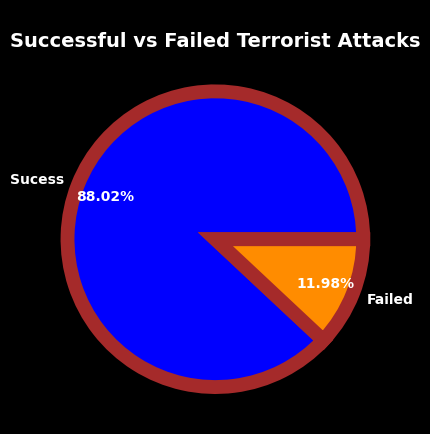

In [35]:
sucessful_proportion = len(sucessful_attempts)/(len(sucessful_attempts) + len(failed_attempts))
failed_proportions = len(failed_attempts)/(len(failed_attempts) + len(sucessful_attempts))

names = ['Sucess', 'Failed']
size = [sucessful_proportion, failed_proportions]

plt.pie(x=size, labels=names, colors=['blue', 'darkorange'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'brown'})

plt.title('\nSuccessful vs Failed Terrorist Attacks', fontsize=14, fontweight='bold')
plt.show()

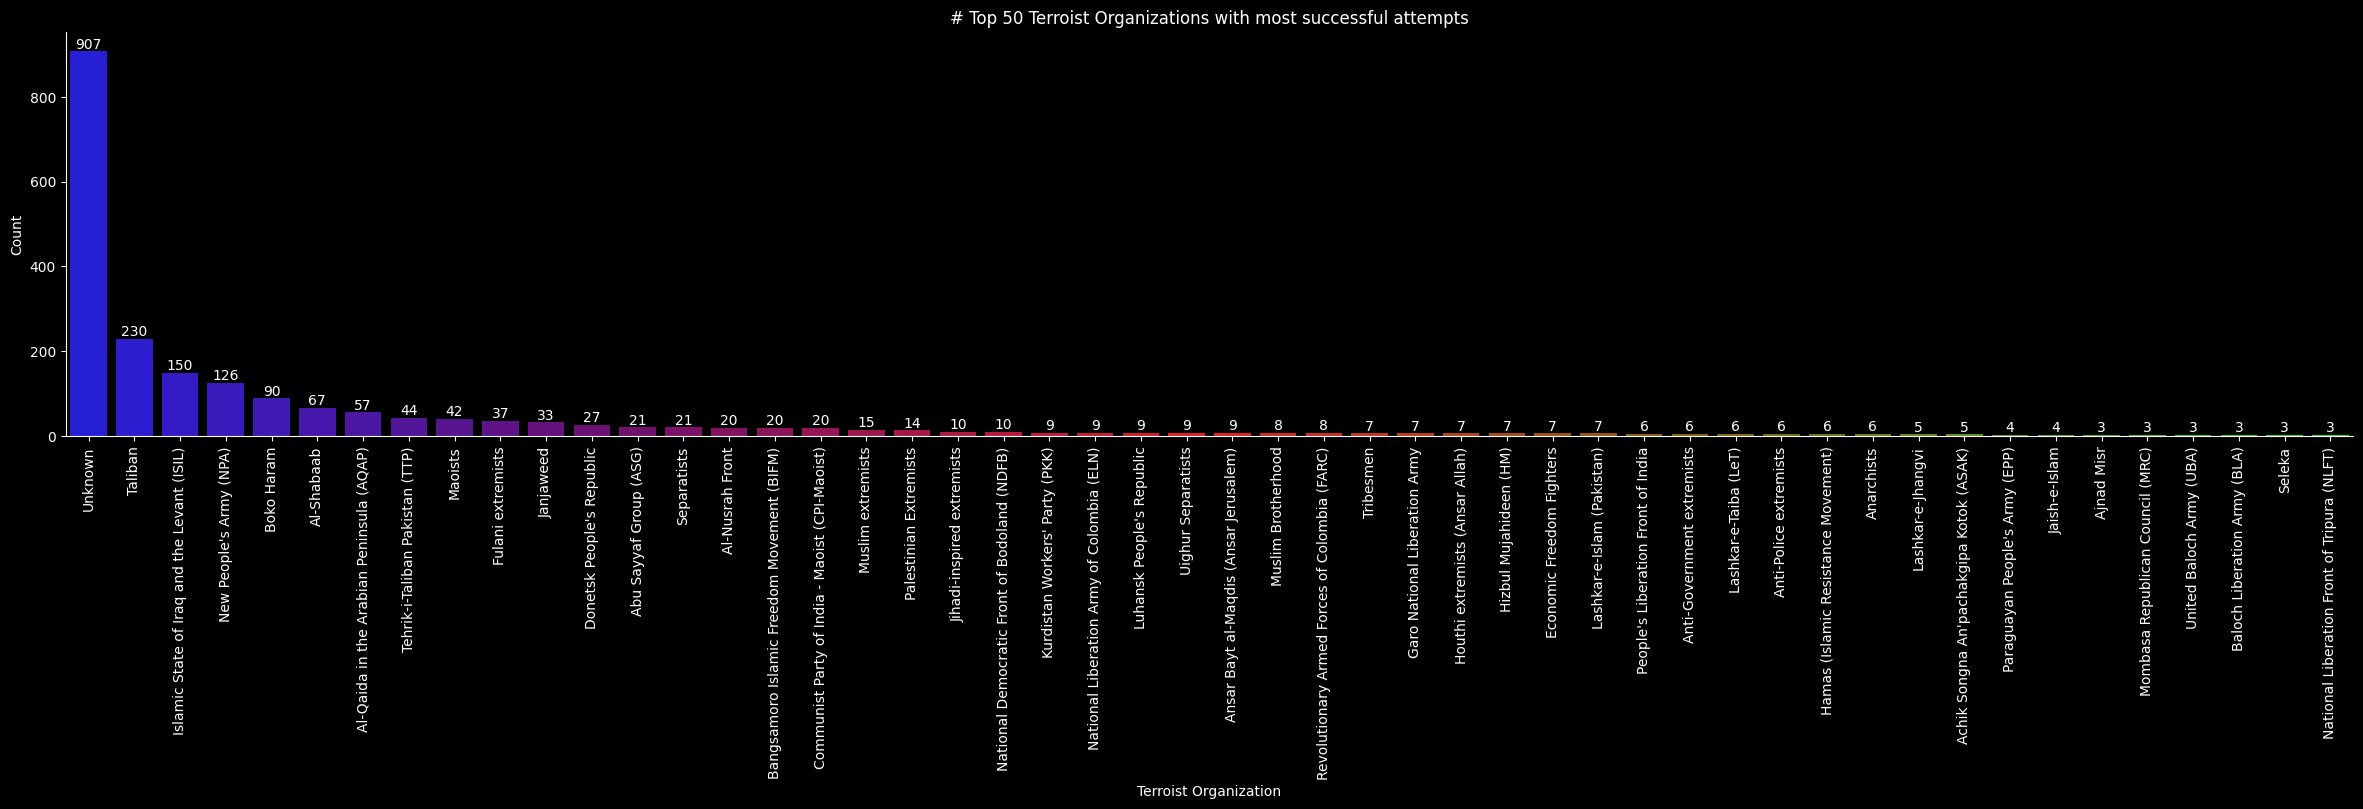

In [36]:
most_suceesful_organization = sucessful_attempts['Organization_name'].value_counts().reset_index()
most_suceesful_organization.rename(columns = {'index':'Organization', 'Organization_name':'Count'}, inplace = True)
plt.figure(figsize=(25, 5))
ax = sns.barplot(x = 'Organization', y = 'Count', data= most_suceesful_organization.head(50), palette='brg')
plt.title('# Top 50 Terroist Organizations with most successful attempts')
sns.despine()
plt.tight_layout()
plt.xlabel('Terroist Organization')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [37]:
# Percentage of Suicide Attacks
suicide_attacks = year_2014[year_2014['suicide'] == 'Yes']
nonsucide_attacks = year_2014[year_2014['suicide'] == 'No']
print(f"Suicide terror attacks are : ", len(suicide_attacks))
print(f"Non-suicide terror attacks are : ", len(nonsucide_attacks))

Suicide terror attacks are :  612
Non-suicide terror attacks are :  1993


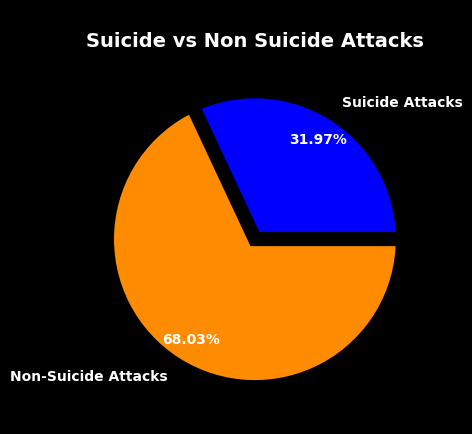

In [38]:
sucessful_proportions= len(suicide_attacks)/(len(suicide_attacks) + len(nonsucide_attacks))
failed_proportions = len(nonsucide_attacks)/(len(nonsucide_attacks) + len(nonsucide_attacks))

names = ['Suicide Attacks', 'Non-Suicide Attacks']
size = [sucessful_proportions, failed_proportions]

plt.pie(x=size, labels=names, colors=['blue', 'darkorange'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'black'})

plt.title('\nSuicide vs Non Suicide Attacks', fontsize=14, fontweight='bold')
plt.show()

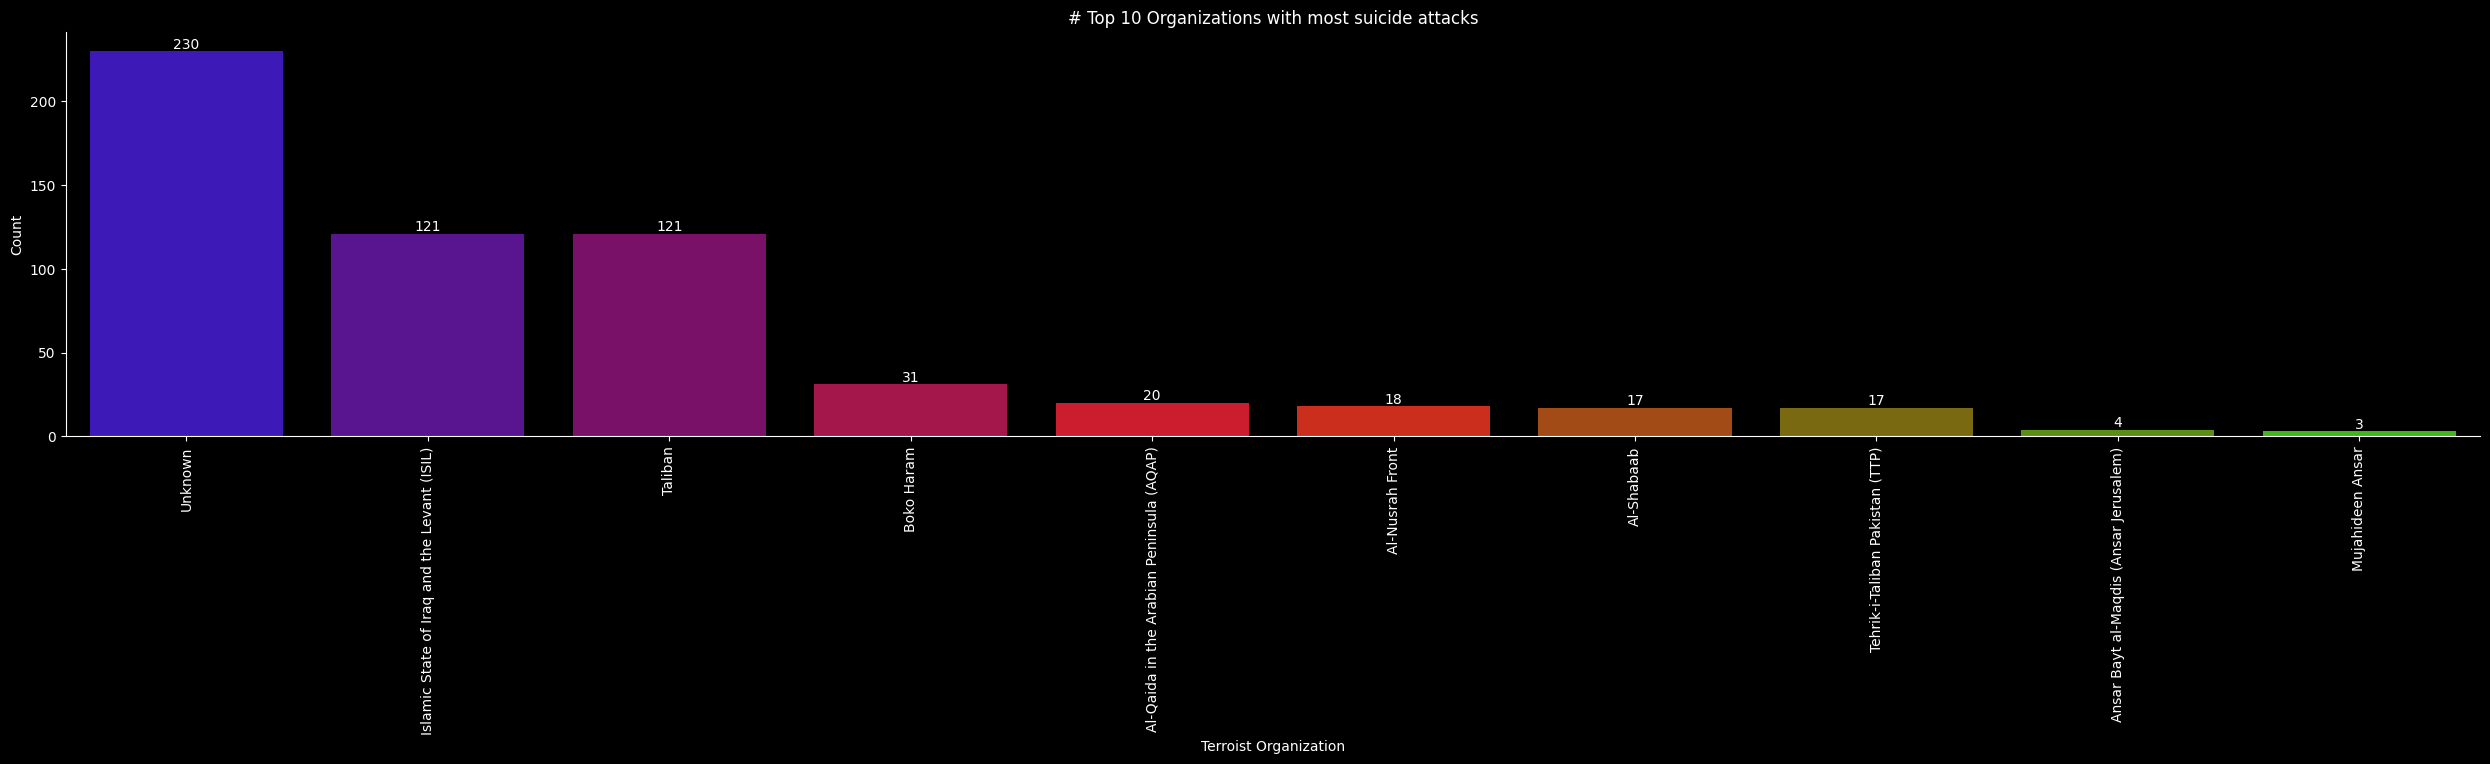

In [39]:
organizations_with_most_suicuide_attacks = suicide_attacks['Organization_name'].value_counts().reset_index()
organizations_with_most_suicuide_attacks.rename(columns = {'index':'Organization', 'Organization_name':'Count'}, inplace = True)
plt.figure(figsize=(25, 5))
ax = sns.barplot(x = 'Organization', y = 'Count', data= organizations_with_most_suicuide_attacks.head(10), palette='brg')
plt.title('# Top 10 Organizations with most suicide attacks')
sns.despine()
plt.tight_layout()
plt.xlabel('Terroist Organization')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [40]:
sucess_suicide=year_2014.loc[(year_2014['suicide'] == 'Yes') & (year_2014['Success'] == 'Yes')]
failed_suicide=year_2014.loc[(year_2014['suicide'] == 'Yes') & (year_2014['Success'] == 'No')]

In [41]:
print(f"Suicide terror attacks that were successful are : ", len(sucess_suicide))
print(f"Suicide terror attacks that weren't successful are : ", len(failed_suicide))

Suicide terror attacks that were successful are :  530
Suicide terror attacks that weren't successful are :  82


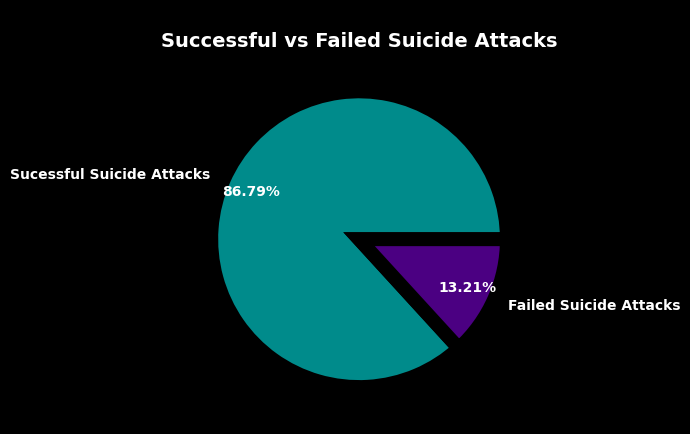

In [42]:
sucessful_proportions = len(sucess_suicide)/(len(sucess_suicide) + len(failed_suicide))
failed_proportions = len(failed_suicide)/(len(sucess_suicide) + len(failed_suicide))

names = ['Sucessful Suicide Attacks', 'Failed Suicide Attacks']
size = [sucessful_proportion, failed_proportions]

plt.pie(x=size, labels=names, colors=['darkcyan', 'indigo'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'black'})

plt.title('\nSuccessful vs Failed Suicide Attacks', fontsize=14, fontweight='bold')
plt.show()

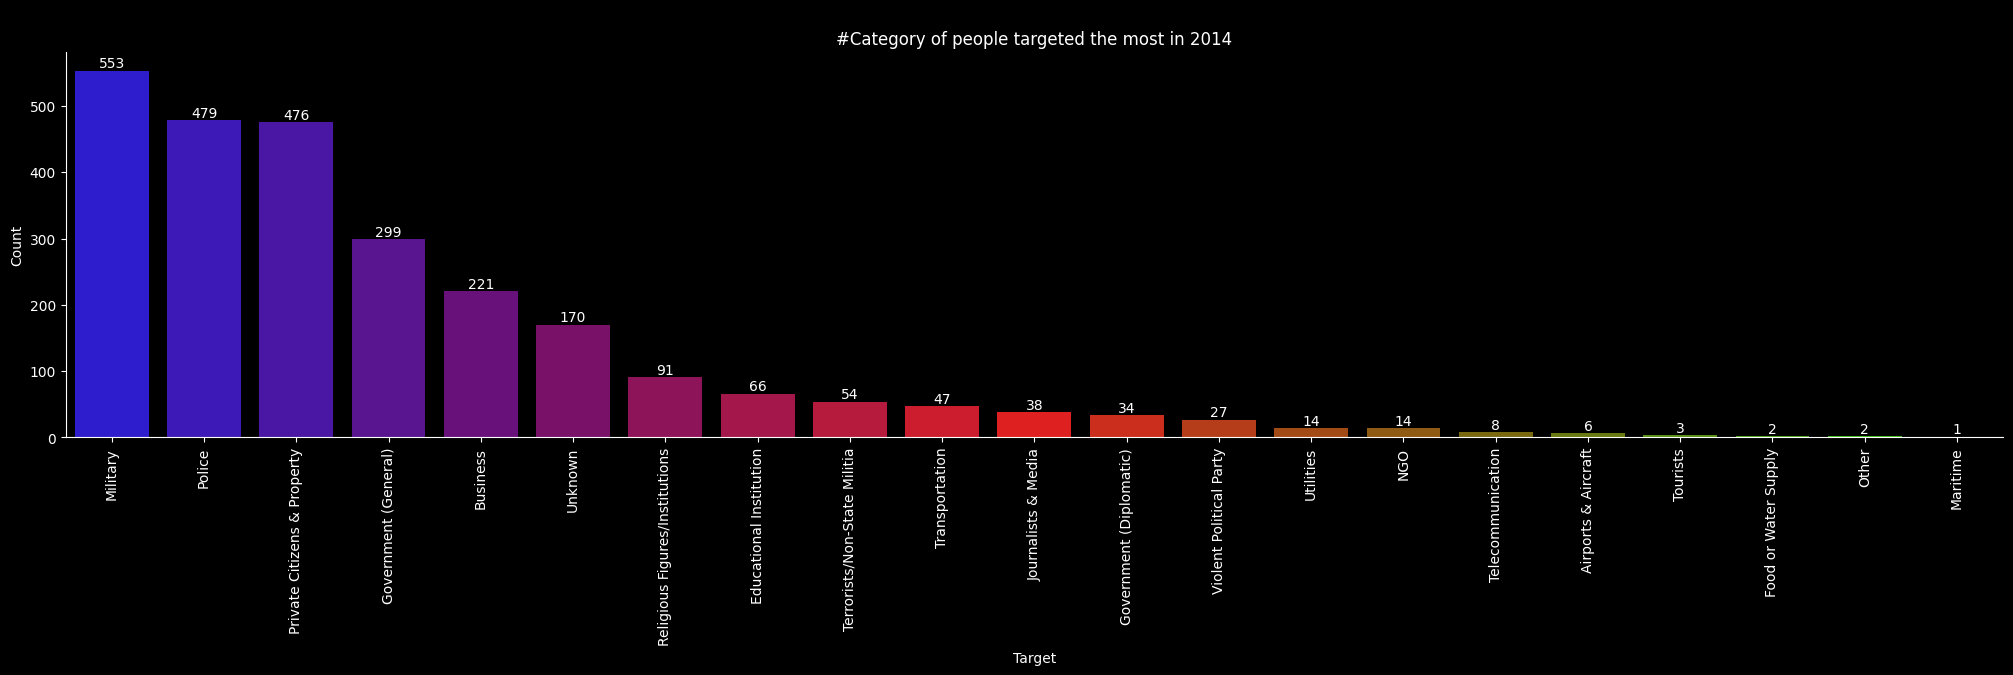

In [43]:
# Category of people that were targeted in 2014
Target_type = year_2014.groupby('Target')['Eventid'].size().reset_index().sort_values('Eventid', ascending = False)
Target_type.rename(columns={'Eventid':'Count'}, inplace=True)
plt.figure(figsize=(25, 5))
ax = sns.barplot(x = 'Target', y = 'Count', data= Target_type, palette='brg')
plt.title('\n#Category of people targeted the most in 2014')
sns.despine()
plt.xlabel('Target')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
# 

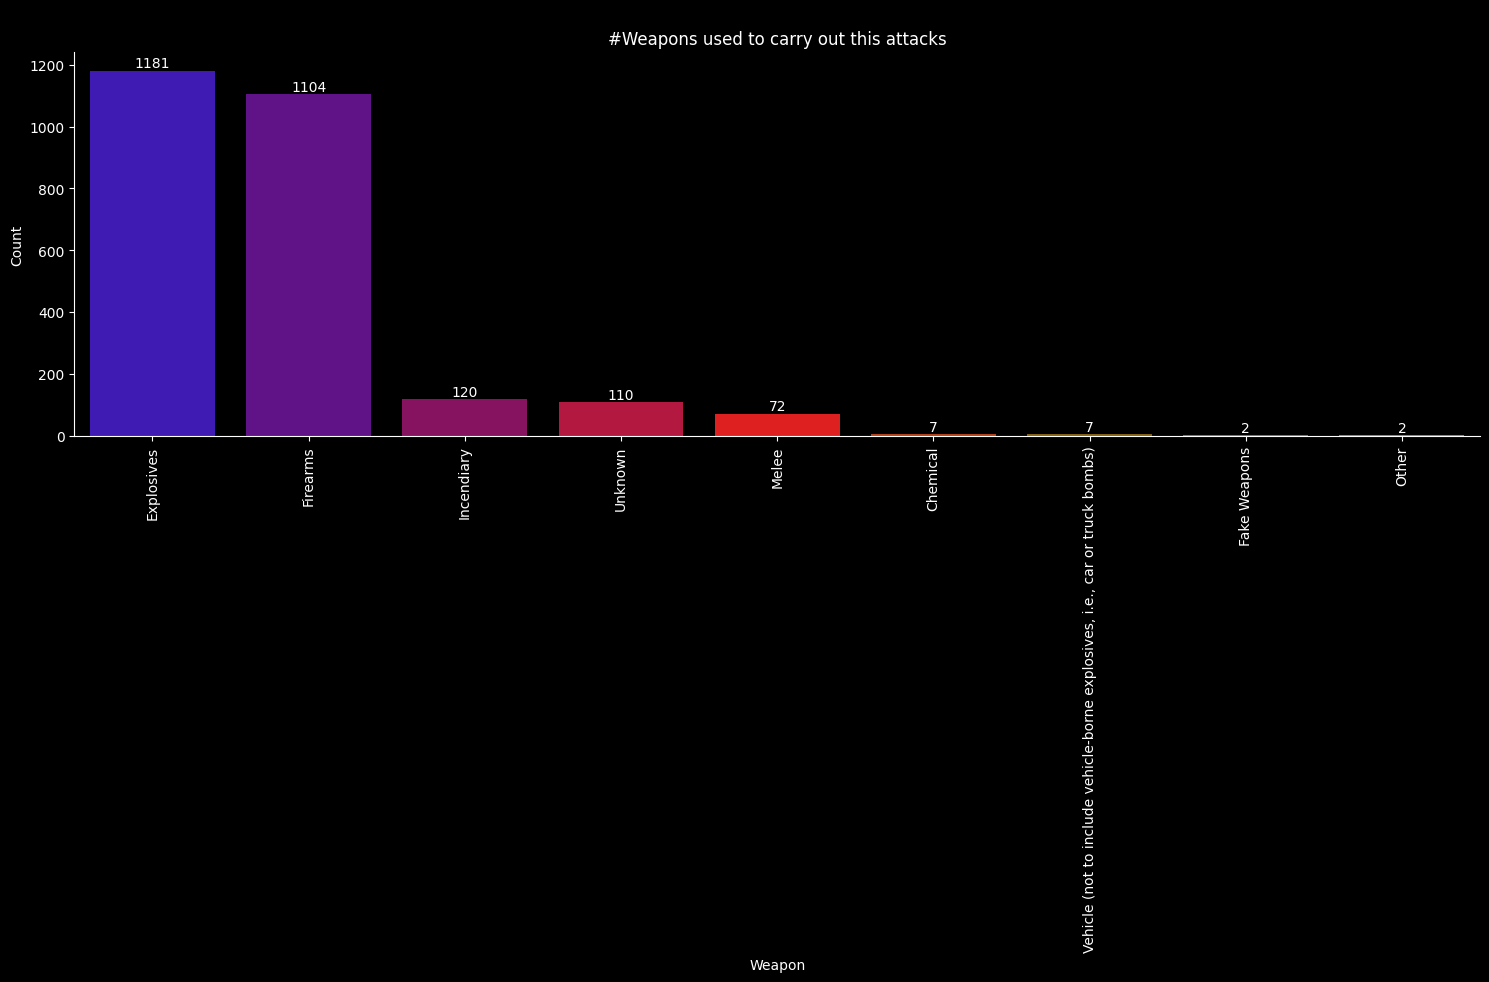

In [44]:
# Weapon Type most used in attacks
Weapon_Type = year_2014.groupby('Weapon_type')['Eventid'].size().reset_index().sort_values('Eventid', ascending = False)
Weapon_Type.rename(columns = {'Eventid':'Count'}, inplace=True)
plt.figure(figsize=(15, 5))
ax = sns.barplot(x = 'Weapon_type', y = 'Count', data= Weapon_Type, palette='brg')
plt.title('\n#Weapons used to carry out this attacks')
sns.despine()
plt.tight_layout()
plt.xlabel('Weapon')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [45]:
# Going back to looking at the dataset as a whole
Year_Region = terror_copy[['Year', 'Region', 'Fatalities']].groupby(['Year', 'Region']).count()
Year_Region.to_csv('YeartoRegion.csv')

In [46]:
# Looking at Africa as a subset of the data 
Africa_df = terror_copy[terror_copy['Region'] == 'Sub-Saharan Africa']
Africa_df


,Eventid,Year,Month,Day,More than 24hr,Country,Region,City,Specificity,Attack_Category,...,Target_Subtype,Organization_name,Perperators,suicide,Weapon_type,Fatalities,Injured,Property_Damaged,Date,YEAR
16,197001110001,1970,January,11,No,Ethiopia,Sub-Saharan Africa,Unknown,5.0,Insurgency/Guerilla Action,...,"Military Personnel (soldiers, troops, officers...",Eritrean Liberation Front,1.0,No,Unknown,1.0,0.0,Undisclosed,1970-11-01,1970
132,197003140001,1970,March,14,Yes,Ethiopia,Sub-Saharan Africa,Unknown,5.0,Undisclosed,...,Newspaper Journalist/Staff/Facility,Eritrean Liberation Front,0.0,No,Unknown,0.0,0.0,Undisclosed,1970-03-14,1970
668,197101150001,1971,January,15,No,Zambia,Sub-Saharan Africa,Unknown,5.0,Undisclosed,...,"Government Personnel (excluding police, military)",Revolutionary Committee of Mozambique (COREMO),0.0,No,Unknown,1.0,0.0,Undisclosed,1971-01-15,1971
679,197101220003,1971,January,22,No,Ethiopia,Sub-Saharan Africa,Bahar Dar,1.0,Undisclosed,...,Aircraft (not at an airport),Eritrean Liberation Front,4.0,No,Unknown,0.0,0.0,Undisclosed,1971-01-22,1971
1720,197301230002,1973,January,23,Yes,Ethiopia,Sub-Saharan Africa,Unknown,4.0,Undisclosed,...,Bank/Commerce,Eritrean Liberation Front,0.0,No,Unknown,0.0,0.0,Undisclosed,1973-01-23,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181484,201712230004,2017,December,23,No,Somalia,Sub-Saharan Africa,Mogadishu,1.0,Undisclosed,...,"Government Personnel (excluding police, military)",Al-Shabaab,2.0,No,Firearms,1.0,0.0,Undisclosed,2017-12-23,2017
181604,201712280021,2017,December,29,No,Cameroon,Sub-Saharan Africa,Kordo,1.0,Undisclosed,...,Undisclosed,Boko Haram,2.0,Yes,Explosives,2.0,0.0,Undisclosed,2017-12-29,2017
181605,201712280022,2017,December,28,No,Nigeria,Sub-Saharan Africa,Amarwa,2.0,Undisclosed,...,Marketplace/Plaza/Square,Boko Haram,1.0,Yes,Explosives,4.0,13.0,Undisclosed,2017-12-28,2017
181653,201712300011,2017,December,31,No,Cameroon,Sub-Saharan Africa,Bia,1.0,Undisclosed,...,Restaurant/Bar/Café,Boko Haram,1.0,Yes,Explosives,2.0,28.0,Minor (likely < $1 million),2017-12-31,2017


C:\Users\maria\AppData\Local\Temp\ipykernel_17640\2437444357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa_df['YEAR'] = Africa_df['Date'].dt.year


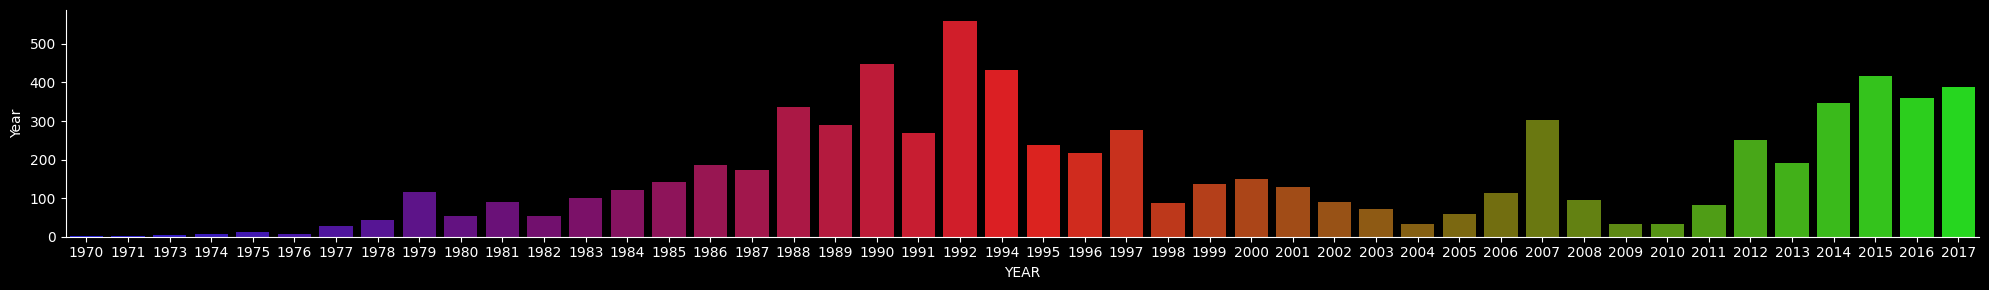

In [47]:
# What Year did the Africa Sub Region Experience the Most Terror Attacks
Africa_df['YEAR'] = Africa_df['Date'].dt.year
Africa_Year = Africa_df.groupby('YEAR')['Eventid'].count().reset_index()
Africa_Year.rename(columns ={'Eventid':'No of Attacks'}, inplace = True)
plt.figure(figsize=(20, 3))
sns.barplot(x = 'YEAR', y = 'No of Attacks', data = Africa_Year, palette='brg')
sns.despine()
plt.tight_layout()
plt.ylabel('Year')
plt.show()

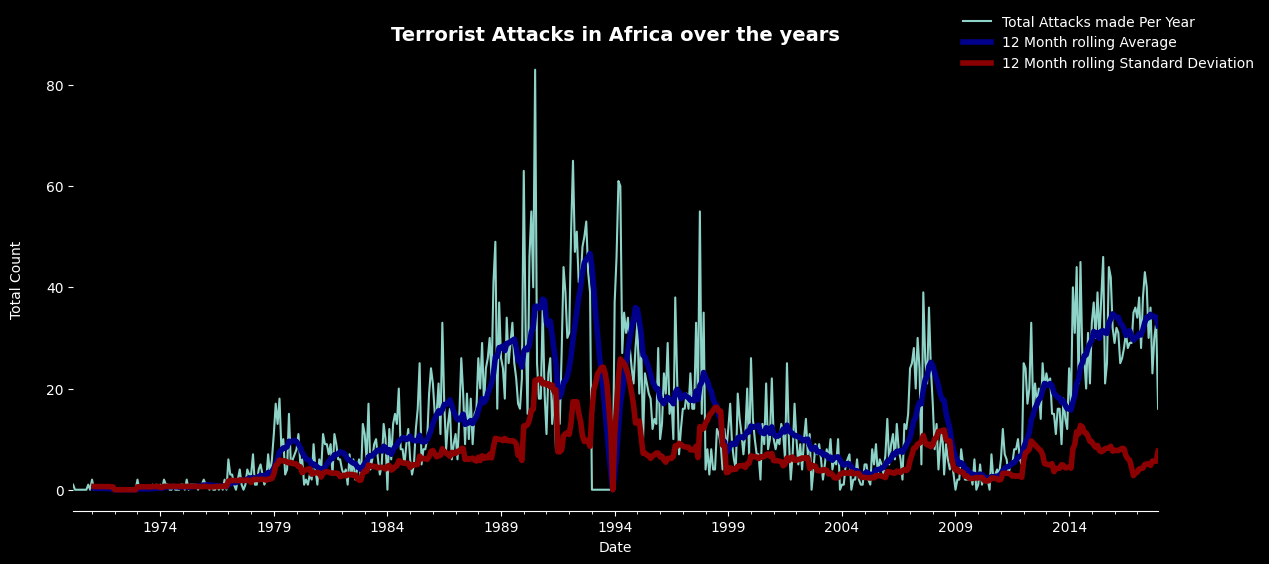

In [48]:
fig, ax = plt.subplots(figsize = (14,6))
Africa_df.set_index('Date').resample('M').size().plot(label = 'Total Attacks made Per Year', ax = ax)
Africa_df.set_index('Date').resample('M').size().rolling(window = 12).mean().plot(color = 'darkblue', linewidth = 4, label = '12 Month rolling Average', ax = ax)
Africa_df.set_index('Date').resample('M').size().rolling(window = 12).std().plot(color = 'darkred', linewidth = 4, label = '12 Month rolling Standard Deviation', ax = ax)
ax.set_title("Terrorist Attacks in Africa over the years", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

<!-- Time Series Here -->

Observation made on the dataset as a whole
1. 

In [49]:
# Countries that were mostly affected in 2014
african_countries = Africa_df.groupby('Country')['Eventid'].size().reset_index()
african_countries.rename(columns={'Eventid':'Count'}, inplace=True)
african_countries = african_countries.sort_values('Count', ascending=False)

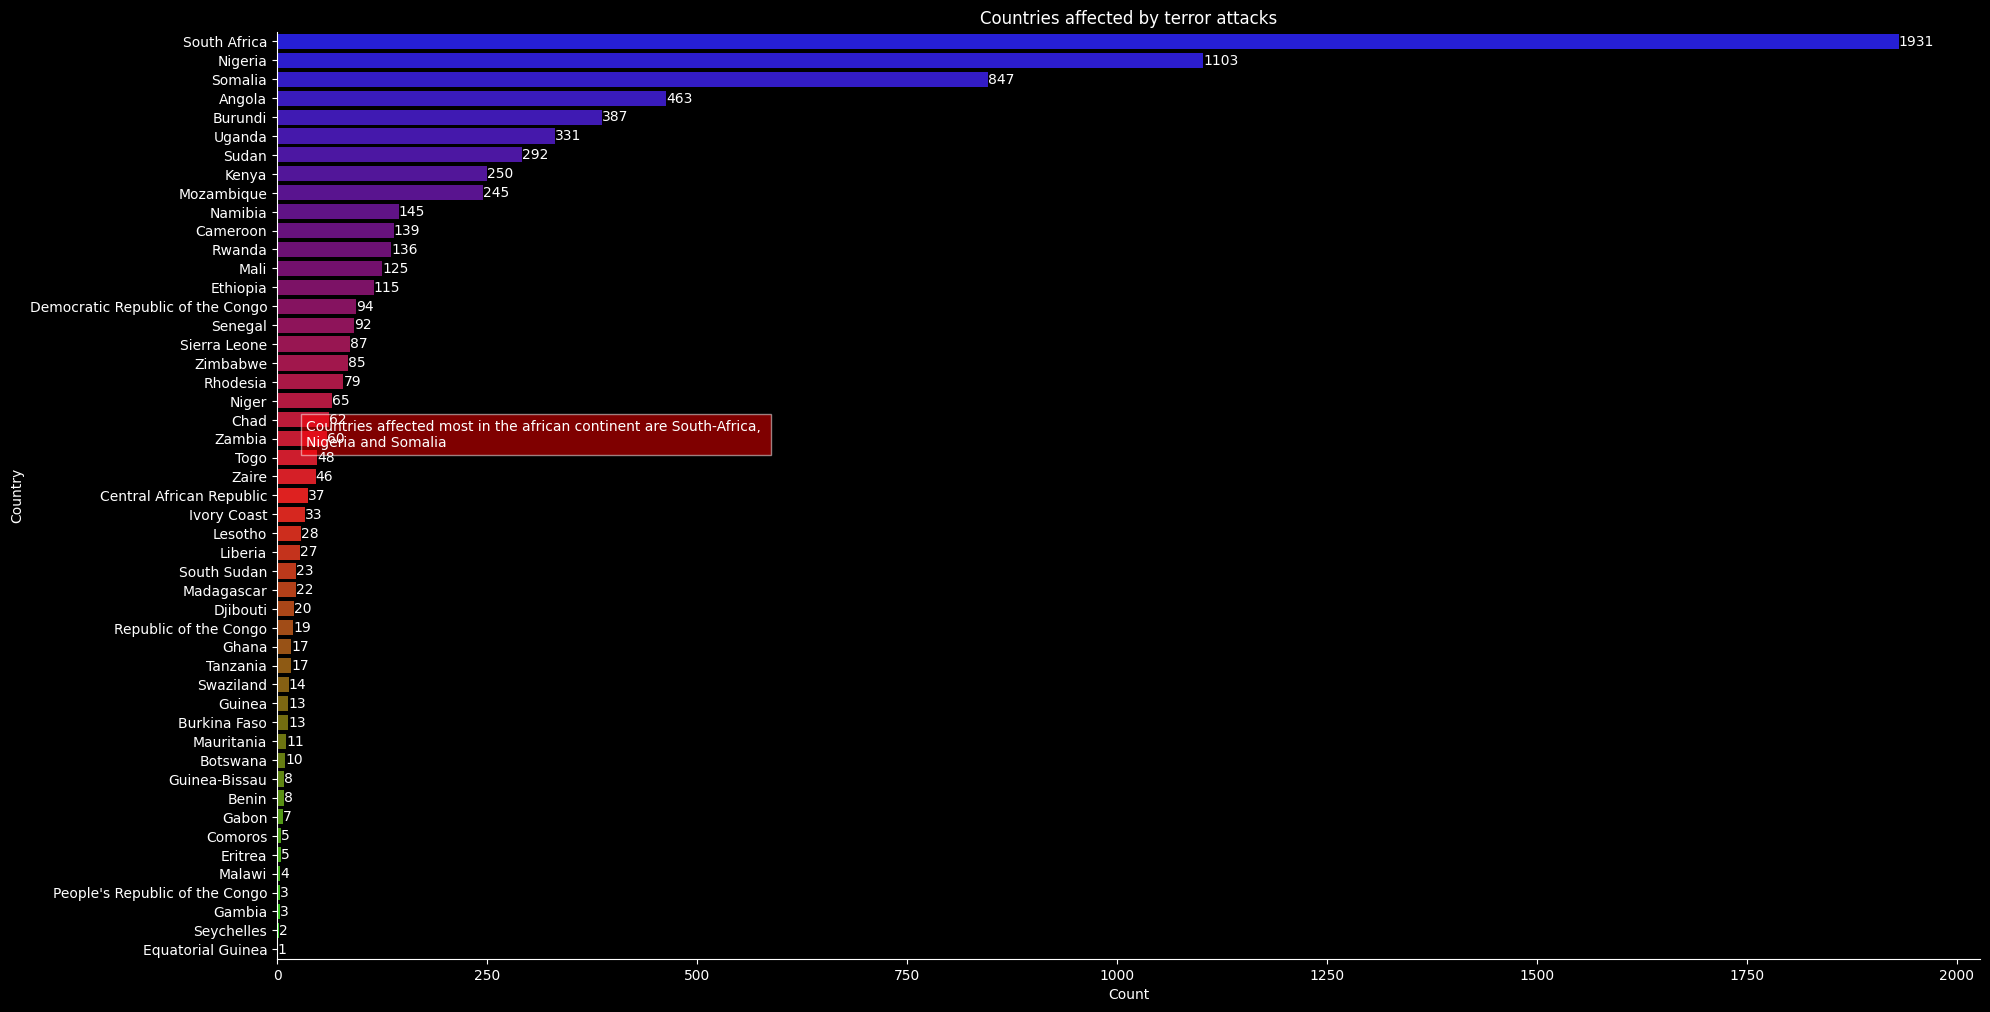

In [50]:
plt.figure(figsize=(20, 10))
p = sns.barplot(x = 'Count', y = 'Country', data = african_countries, palette='brg')
sns.despine()
plt.tight_layout()
p.text(35,20,'Countries affected most in the african continent are South-Africa, \nNigeria and Somalia', bbox=dict(facecolor='red', alpha=0.50), ha = 'left', va = 'top')
p.set(title="Countries affected by terror attacks") 
for bars in p.containers:
    p.bar_label(bars)
plt.show()

In [51]:
africa_org = Africa_df.groupby('Organization_name')['Eventid'].count().reset_index()
africa_org.rename(columns={'Organization_name':'Organization', 'Eventid':'Count'}, inplace=True)
africa_org = africa_org.loc[africa_org['Count'] != 1]
africa_org = africa_org.sort_values('Count', ascending=False)

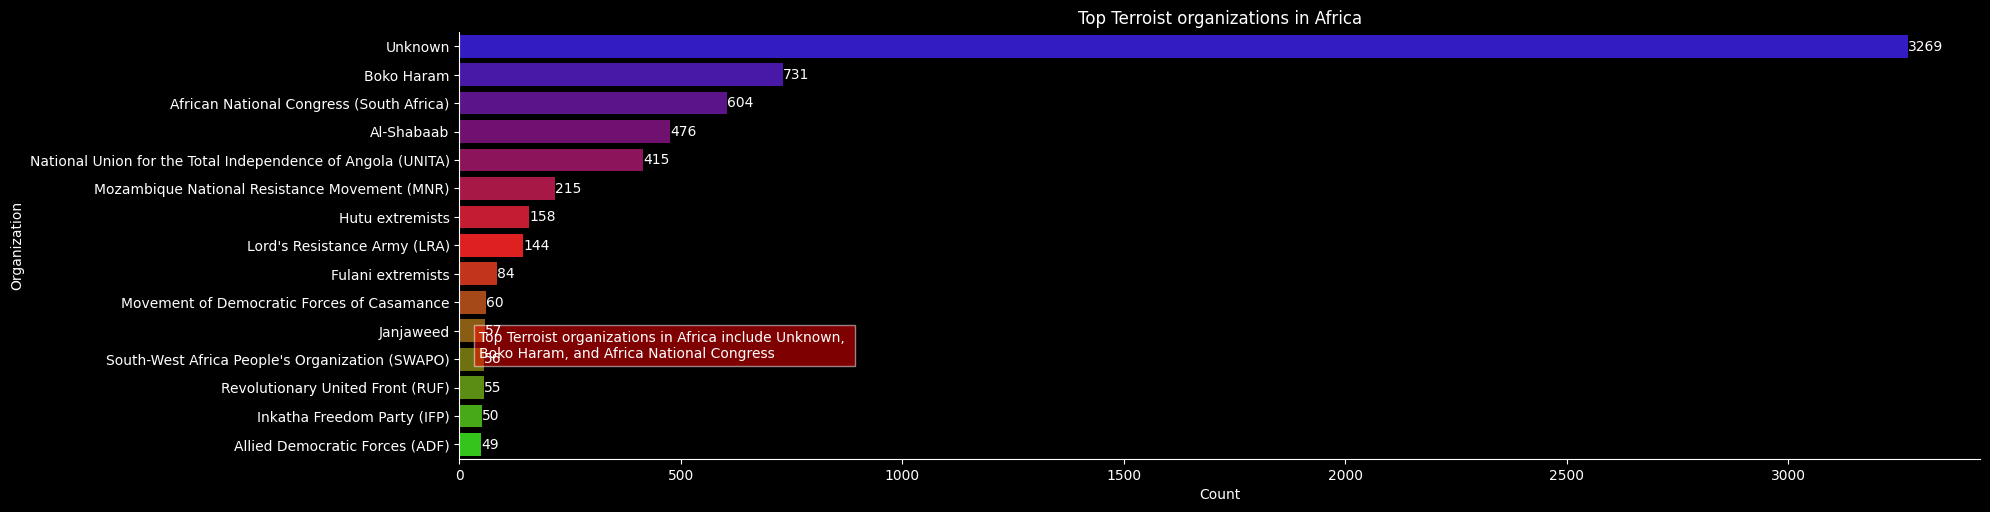

In [52]:
plt.figure(figsize=(20, 5))
p = sns.barplot(x = 'Count', y = 'Organization', data = africa_org.head(15), palette='brg')
sns.despine()
plt.tight_layout()
p.text(45,10,'Top Terroist organizations in Africa include Unknown, \nBoko Haram, and Africa National Congress', bbox=dict(facecolor='red', alpha=0.50), ha = 'left', va = 'top')
p.set(title="Top Terroist organizations in Africa") 
for bars in p.containers:
    p.bar_label(bars)
plt.show()

In [53]:
Organization_by_Country = Africa_df[['Country', 'Organization_name', 'Fatalities']].groupby(['Country', 'Organization_name']).count()
Organization_by_Country = Organization_by_Country.loc[Organization_by_Country['Fatalities'] != 1]
Organization_by_Country

Fatalities
Country  Organization_name                                             
Angola   Angola Rebels                                                2
         Bandits                                                      2
         Front for the Liberation of Cabinda / Cabinda A...           2
         Front for the Liberation of the Enclave of Cabi...          13
         National Union for the Total Independence of An...         379
...                                                                 ...
Zimbabwe Mozambique National Resistance Movement (MNR)                8
         Supporters of Joshua Nkomo                                   8
         Unknown                                                     48
         Zimbabwe African Nationalist Union (ZANU)                    7
         Zimbabwe African People's Union                              3

[251 rows x 1 columns]

In [54]:
Organization_by_Country.to_csv('African Countries.csv')

In [55]:
# Failed vs Sucessful attempts in Africa
sucessful_attempts = Africa_df[Africa_df['Success'] == 'Yes']
failed_attempts = Africa_df[Africa_df['Success'] == 'No']
print(f"Successful terror attacks in Africa are : ", len(sucessful_attempts))
print(f"Failed terror attacks in Africa are : ", len(failed_attempts))

Successful terror attacks in Africa are :  7077
Failed terror attacks in Africa are :  500


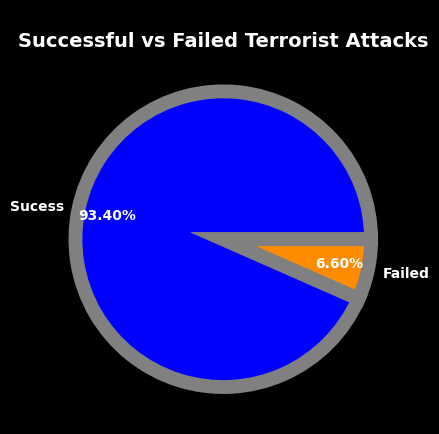

In [56]:
sucessful_proportion = len(sucessful_attempts)/(len(sucessful_attempts) + len(failed_attempts))
failed_proportions = len(failed_attempts)/(len(failed_attempts) + len(sucessful_attempts))

names = ['Sucess', 'Failed']
size = [sucessful_proportion, failed_proportions]

plt.pie(x=size, labels=names, colors=['blue', 'darkorange'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'gray'})

plt.title('\nSuccessful vs Failed Terrorist Attacks', fontsize=14, fontweight='bold')
plt.show()

In [57]:
suicide_attacks = Africa_df[Africa_df['suicide'] == 'Yes']
nonsucide_attacks = Africa_df[Africa_df['suicide'] == 'No']
print(f"Suicide terror attacks are : ", len(suicide_attacks))
print(f"Non-suicide terror attacks are : ", len(nonsucide_attacks))

Suicide terror attacks are :  623
Non-suicide terror attacks are :  6954


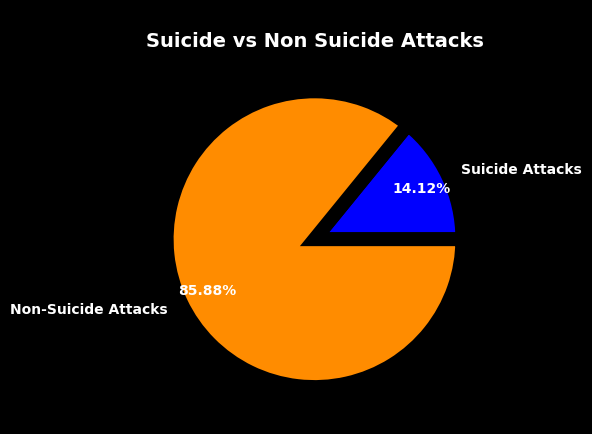

In [58]:
sucessful_proportions= len(suicide_attacks)/(len(suicide_attacks) + len(nonsucide_attacks))
failed_proportions = len(nonsucide_attacks)/(len(nonsucide_attacks) + len(nonsucide_attacks))

names = ['Suicide Attacks', 'Non-Suicide Attacks']
size = [sucessful_proportions, failed_proportions]

plt.pie(x=size, labels=names, colors=['blue', 'darkorange'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'black'})

plt.title('\nSuicide vs Non Suicide Attacks', fontsize=14, fontweight='bold')
plt.show()

In [59]:
sucess_suicide=Africa_df.loc[(Africa_df['suicide'] == 'Yes') & (Africa_df['Success'] == 'Yes')]
failed_suicide=Africa_df.loc[(Africa_df['suicide'] == 'Yes') & (Africa_df['Success'] == 'No')]

In [60]:
print(f"Suicide terror attacks that were successful are : ", len(sucess_suicide))
print(f"Suicide terror attacks that weren't successful are : ", len(failed_suicide))

Suicide terror attacks that were successful are :  543
Suicide terror attacks that weren't successful are :  80


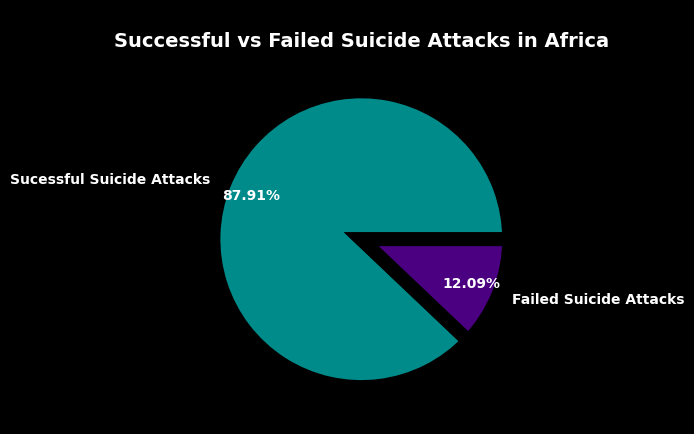

In [61]:
sucessful_proportions = len(sucess_suicide)/(len(sucess_suicide) + len(failed_suicide))
failed_proportions = len(failed_suicide)/(len(sucess_suicide) + len(failed_suicide))

names = ['Sucessful Suicide Attacks', 'Failed Suicide Attacks']
size = [sucessful_proportion, failed_proportions]

plt.pie(x=size, labels=names, colors=['darkcyan', 'indigo'], 
        autopct='%1.2f%%', pctdistance=0.8, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':10, 'edgecolor':'black'})

plt.title('\nSuccessful vs Failed Suicide Attacks in Africa', fontsize=14, fontweight='bold')
plt.show()

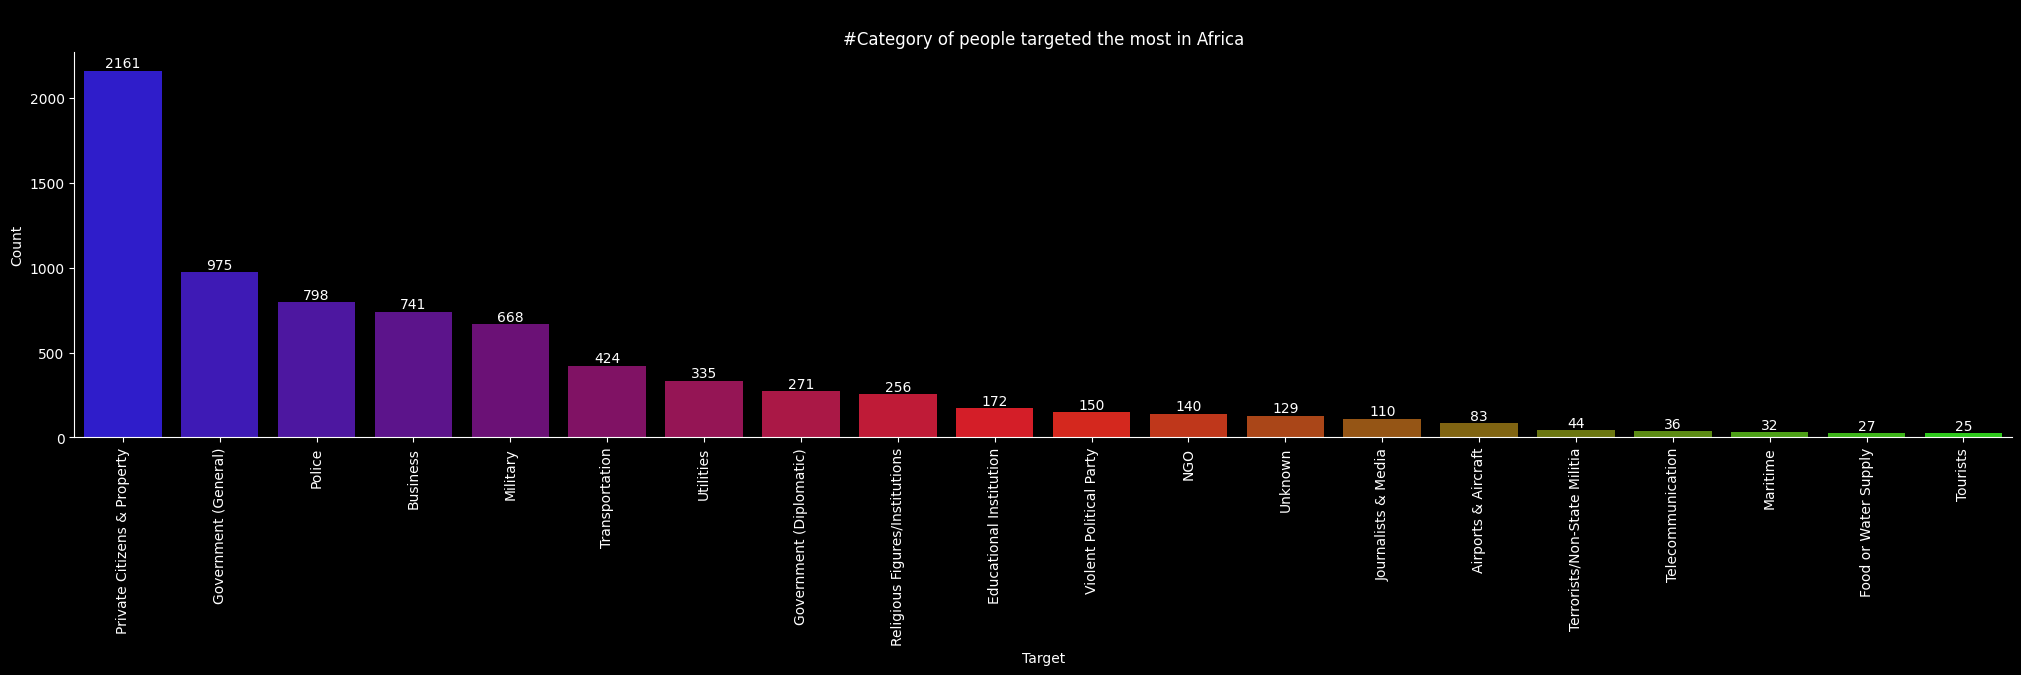

In [62]:
# Category of people that were targeted in 2014
Afr_target = Africa_df.groupby('Target')['Eventid'].size().reset_index().sort_values('Eventid', ascending = False)
Afr_target.rename(columns={'Eventid':'Count'}, inplace=True)
plt.figure(figsize=(25, 5))
ax = sns.barplot(x = 'Target', y = 'Count', data= Afr_target, palette='brg')
plt.title('\n#Category of people targeted the most in Africa')
sns.despine()
plt.xlabel('Target')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [63]:
Africa_property = Africa_df.groupby('Property_Damaged')['Eventid'].count().reset_index()
Africa_property.rename(columns={'Property_Damaged':'Property', 'Eventid':'Count'}, inplace=True)
Africa_property = Africa_property.sort_values('Count', ascending=False)

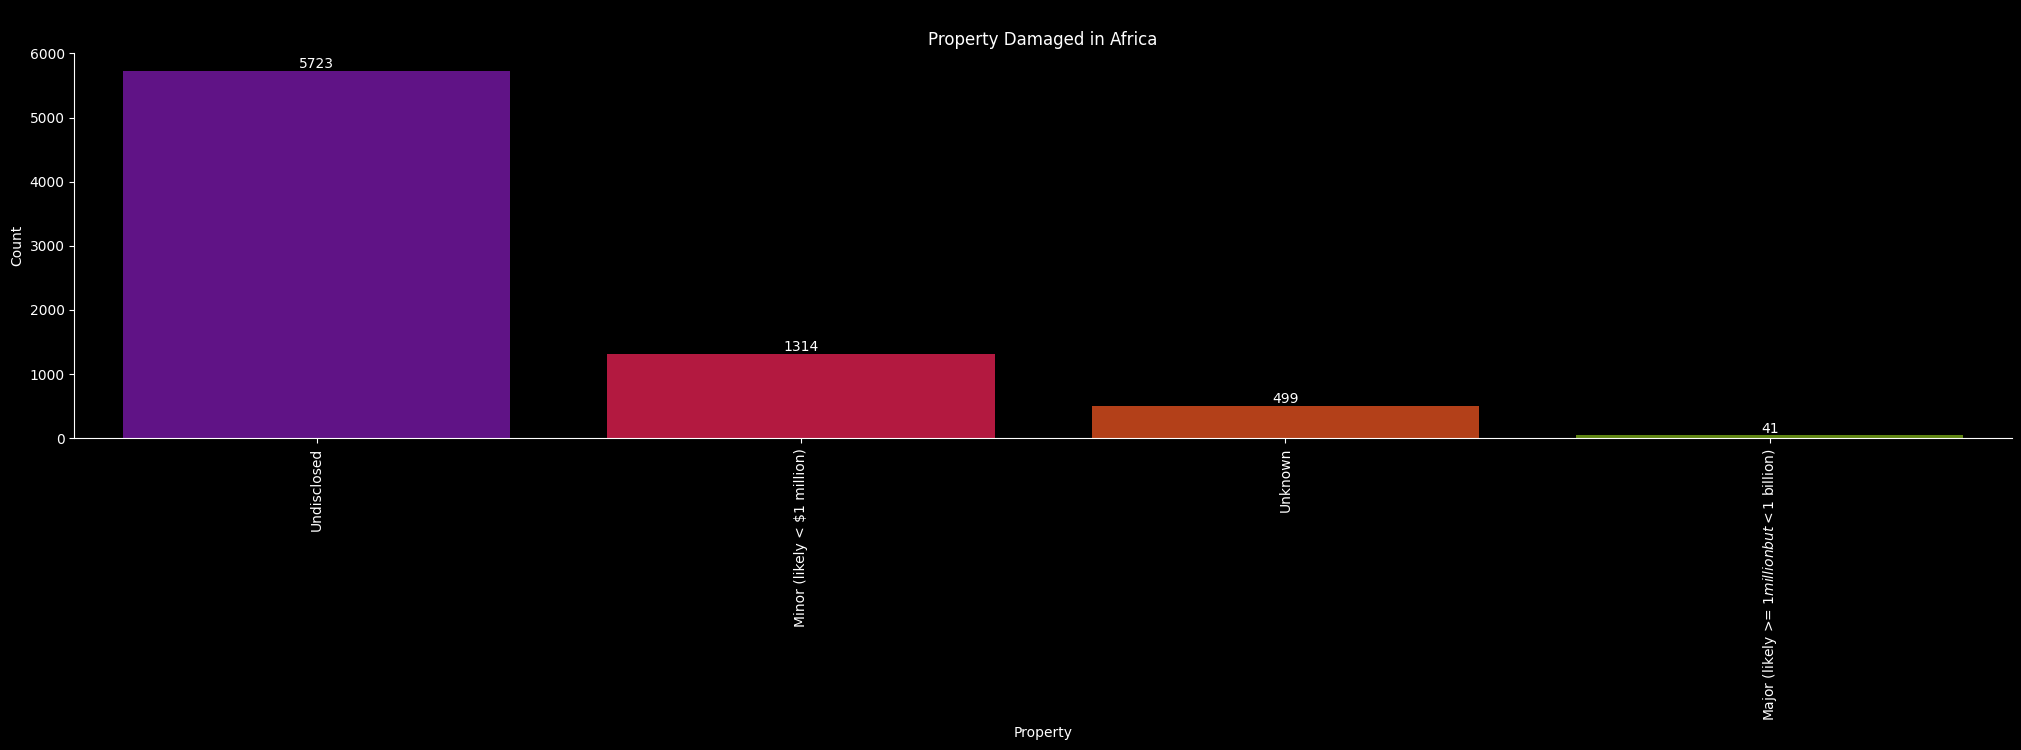

In [64]:
plt.figure(figsize=(25, 5))
ax = sns.barplot(x = 'Property', y = 'Count', data=Africa_property, palette='brg')
plt.title('\nProperty Damaged in Africa')
sns.despine()
plt.xlabel('Property')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [71]:
Country_attacks_fatalities = pd.pivot_table(
   Africa_df,
   index=['Country'],
   aggfunc={'Eventid': len, 'Fatalities': np.sum}
).rename(columns={'Eventid': 'Attacks'}).sort_values(['Attacks','Fatalities'], ascending = False)

In [72]:
Country_attacks_fatalities

,Attacks,Fatalities
Country,,
South Africa,1931,2604.0
Nigeria,1103,7957.0
Somalia,847,3492.0
Angola,463,2932.0
Burundi,387,3842.0
Uganda,331,2764.0
Sudan,292,1600.0
Kenya,250,1203.0
Mozambique,245,2580.0


Text(0, 0.5, 'Attacks')

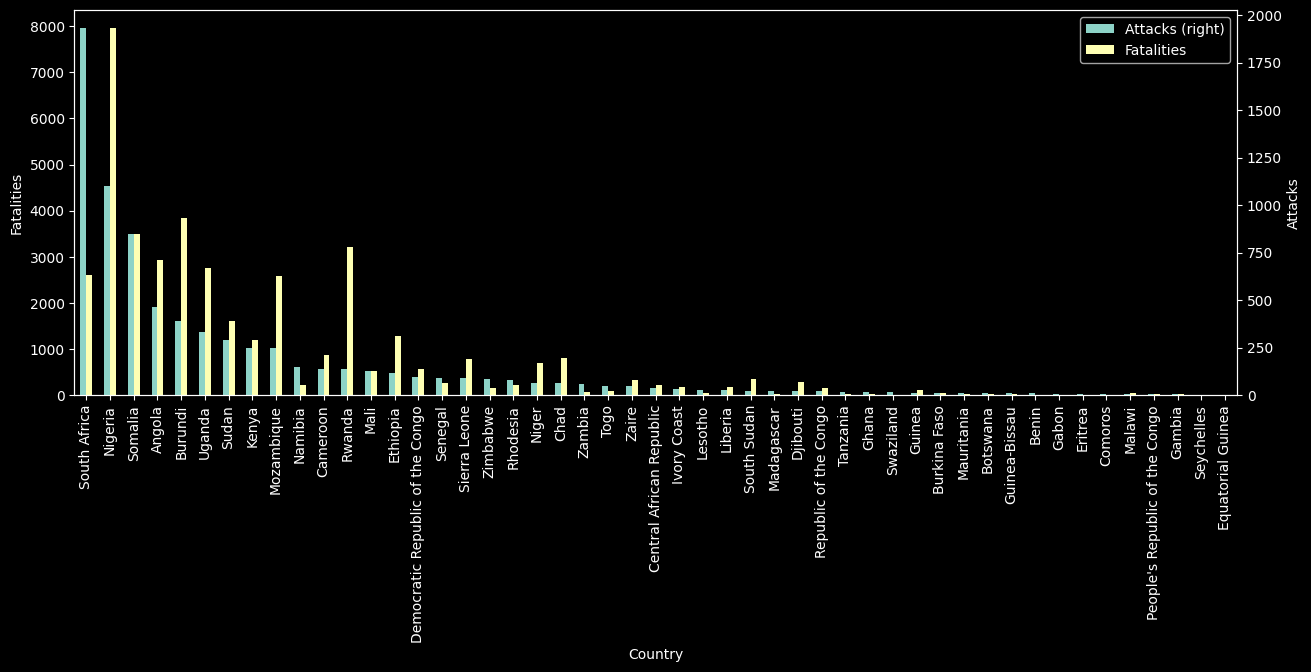

In [81]:
Country_attacks_fatalities.plot.bar(figsize=(15,5), secondary_y= 'Attacks')

ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes

ax1.set_ylabel('Fatalities')

ax2.set_ylabel('Attacks')

In [69]:
pd.pivot_table(
   Africa_df,
   index=['YEAR','Country'],
   aggfunc={'Eventid': len, 'Fatalities': np.sum}
).rename(columns={'Eventid': 'Attacks'}).sort_values(['YEAR'], ascending = False)

Attacks  Fatalities
YEAR Country                          
2017 Uganda              1         0.0
     Kenya              18        24.0
     Burkina Faso        3         5.0
     Burundi             6        12.0
     Cameroon           42       135.0
...                    ...         ...
1973 Sudan               1         3.0
     Ethiopia            1         0.0
1971 Zambia              1         1.0
     Ethiopia            1         0.0
1970 Ethiopia            2         1.0

[669 rows x 2 columns]

In [84]:
# Grouping Year, Attacks and Fatalities from the dataset as a whole
Year_attacks_fatalities = pd.pivot_table(
   terror_copy,
   index=['YEAR'],
   aggfunc={'Eventid': len, 'Fatalities': np.sum}
).rename(columns={'Eventid': 'Attacks'}).sort_values(['Attacks','Fatalities'])

In [85]:
Year_attacks_fatalities

,Attacks,Fatalities
YEAR,,
1970,314,160.0
1971,346,162.0
1973,455,367.0
1972,463,565.0
1974,537,537.0
2009,631,2467.0
1975,679,586.0
2010,694,2268.0
2011,818,2720.0
